# **Problem Statement - Part A**

## Context

In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.

## Objective

A group of venture capitalists want to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, they aim to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, they foresee facilitating the following with the help of the tool:

1. Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.
2. Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.

They have hired you as a data scientist and provided you with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will be tagged as a defaulter in terms of net worth next year. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.

## Data Dictionary

The data consists of financial metrics from the balance sheets of different companies. The detailed data dictionary is given below.

* Networth Next Year: Net worth of the customer in the next year
* Total assets: Total assets of customer
* Net worth: Net worth of the customer of the present year
* Total income: Total income of the customer
* Change in stock: Difference between the current value of the stock and the value of stock in the last trading day
* Total expenses: Total expenses done by the customer
* Profit after tax: Profit after tax deduction
* PBDITA: Profit before depreciation, income tax, and amortization
* PBT: Profit before tax deduction
* Cash profit: Total Cash profit
* PBDITA as % of total income: PBDITA / Total income
* PBT as % of total income: PBT / Total income
* PAT as % of total income: PAT / Total income
* Cash profit as % of total income: Cash Profit / Total income
* PAT as % of net worth: PAT / Net worth
* Sales: Sales done by the customer
* Income from financial services: Income from financial services
* Other income: Income from other sources
* Total capital: Total capital of the customer
* Reserves and funds: Total reserves and funds of the customer
* Borrowings: Total amount borrowed by the customer
* Current liabilities & provisions: current liabilities of the customer
* Deferred tax liability: Future income tax customer will pay because of the current transaction
* Shareholders funds: Amount of equity in a company which belongs to shareholders
* Cumulative retained profits: Total cumulative profit retained by customer
* Capital employed: Current asset minus current liabilities
* TOL/TNW: Total liabilities of the customer divided by Total net worth
* Total term liabilities / tangible net worth: Short + long term liabilities divided by tangible net worth
* Contingent liabilities / Net worth (%): Contingent liabilities / Net worth
* Contingent liabilities: Liabilities because of uncertain events
* Net fixed assets: The purchase price of all fixed assets
* Investments: Total invested amount
* Current assets: Assets that are expected to be converted to cash within a year
* Net working capital: Difference between the current liabilities and current assets
* Quick ratio (times): Total cash divided by current liabilities
* Current ratio (times): Current assets divided by current liabilities
* Debt to equity ratio (times): Total liabilities divided by its shareholder equity
* Cash to current liabilities (times): Total liquid cash divided by current liabilities
* Cash to average cost of sales per day: Total cash divided by the average cost of the sales
* Creditors turnover: Net credit purchase divided by average trade creditors
* Debtors turnover: Net credit sales divided by average accounts receivable
* Finished goods turnover: Annual sales divided by average inventory
* WIP turnover: The cost of goods sold for a period divided by the average inventory for that period
* Raw material turnover: Cost of goods sold is divided by the average inventory for the same period
* Shares outstanding: Number of issued shares minus the number of shares held in the company
* Equity face value: cost of the equity at the time of issuing
* EPS: Net income divided by the total number of outstanding share
* Adjusted EPS: Adjusted net earnings divided by the weighted average number of common shares outstanding on a diluted basis during the plan year
* Total liabilities: Sum of all types of liabilities
* PE on BSE: Company's current stock price divided by its earnings per share



**Note:** A company will not be tagged as a defaulter if its net worth next year is positive, or else, it'll be tagged as a defaulter.

# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))

# Loading the Data

In [ ]:
# loading the data from drive
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/My Drive/FRA-Comp_Fin_Data.csv')
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   

   Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors turnover  Finished goods turnover  WIP turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw material turnover  Shares outstanding  Equity face value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                    NaN                 NaN                NaN   0.00   
2                   8.35                 NaN                NaN   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted EPS  Total liabilities  PE on BSE  
0          4.44              827.6        NaN  
1          0.00               67.7        NaN  
2          0.00              238.4        NaN  
3         17.60             6883.5        NaN  
4         -6.52               90.9        NaN  

[5 rows x 51 columns]

Fixing messy column names (containing spaces) for ease of use

In [ ]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

# Data Overview

In [ ]:
# viewing the first 5 rows of the data
df.head()

Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   

   Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors_turnover  Finished_goods_turnover  WIP_turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                    NaN                 NaN                NaN   0.00   
2                   8.35                 NaN                NaN   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted_EPS  Total_liabilities  PE_on_BSE  
0          4.44              827.6        NaN  
1          0.00               67.7        NaN  
2          0.00              238.4        NaN  
3         17.60             6883.5        NaN  
4         -6.52               90.9        NaN  

[5 rows x 51 columns]

In [ ]:
# viewing the last 5 rows of the data
df.tail()

Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  \
4251  4252                 0.2           0.4        0.2           NaN   
4252  4253                93.3         159.6       86.7         172.9   
4253  4254               932.2         833.8      664.6        2314.7   
4254  4255                64.6          95.0       48.5         110.5   
4255  4256                 0.0         384.6      111.3         345.8   

      Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  ...  \
4251              NaN             NaN               NaN     NaN    NaN  ...   
4252              0.1           169.7               3.3    18.4    3.7  ...   
4253             32.1          2151.6             195.2   348.4  303.0  ...   
4254              4.6           113.5               1.6     9.7    2.6  ...   
4255             11.3           341.7              15.4    57.6   20.7  ...   

      Debtors_turnover  Finished_goods_turnover  WIP_turnover  \
4251              0.00                      NaN           NaN   
4252              1.80                    11.00          8.28   
4253              6.08                    59.28         31.14   
4254              3.71                    78.99         11.51   
4255              4.71                    53.37          8.33   

      Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  \
4251                   0.00                 NaN                NaN   0.00   
4252                   9.88           8162700.0               10.0   0.42   
4253                   9.87           7479762.0               10.0  26.58   
4254                  14.95                 NaN                NaN   0.00   
4255                   3.74            960000.0               10.0  15.63   

      Adjusted_EPS  Total_liabilities  PE_on_BSE  
4251          0.00                0.4        NaN  
4252          0.42              159.6      16.81  
4253         26.58              833.8       5.69  
4254          0.00               95.0        NaN  
4255         15.63              384.6        NaN  

[5 rows x 51 columns]

In [ ]:
# Checking the shape of the dataset
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


In [ ]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [ ]:
# checking for no. of unique values
df.nunique()

Num                                               4256
Networth_Next_Year                                2574
Total_assets                                      2961
Net_worth                                         2376
Total_income                                      2870
Change_in_stock                                   1164
Total_expenses                                    2898
Profit_after_tax                                  1467
PBDITA                                            1826
PBT                                               1568
Cash_profit                                       1655
PBDITA_as_perc_of_total_income                    2032
PBT_as_perc_of_total_income                       1878
PAT_as_perc_of_total_income                       1692
Cash_profit_as_perc_of_total_income               1867
PAT_as_perc_of_net_worth                          2385
Sales                                             2847
Income_from_fincial_services                       561
Other_income                                       406
Total_capital                                     1525
Reserves_and_funds                                2361
Borrowings                                        2135
Current_liabilities_&_provisions                  2095
Deferred_tax_liability                             950
Shareholders_funds                                2413
Cumulative_retained_profits                       2265
Capital_employed                                  2783
TOL_to_TNW                                         841
Total_term_liabilities__to__tangible_net_worth     508
Contingent_liabilities__to__Net_worth_perc        1926
Contingent_liabilities                            1351
Net_fixed_assets                                  2234
Investments                                        894
Current_assets                                    2488
Net_working_capital                               2065
Quick_ratio_times                                  409
Current_ratio_times                                517
Debt_to_equity_ratio_times                         642
Cash_to_current_liabilities_times                  249
Cash_to_average_cost_of_sales_per_day             2051
Creditors_turnover                                1608
Debtors_turnover                                  1640
Finished_goods_turnover                           2201
WIP_turnover                                      1941
Raw_material_turnover                             1601
Shares_outstanding                                2370
Equity_face_value                                   18
EPS                                               1815
Adjusted_EPS                                      1730
Total_liabilities                                 2961
PE_on_BSE                                         1142
dtype: int64

Statistical Summary of the given Datasets

In [ ]:
# Numerical Data
df.describe().T

count          mean  \
Num                                             4256.0  2.128500e+03   
Networth_Next_Year                              4256.0  1.344741e+03   
Total_assets                                    4256.0  3.573617e+03   
Net_worth                                       4256.0  1.351950e+03   
Total_income                                    4025.0  4.688190e+03   
Change_in_stock                                 3706.0  4.370248e+01   
Total_expenses                                  4091.0  4.356301e+03   
Profit_after_tax                                4102.0  2.950506e+02   
PBDITA                                          4102.0  6.059406e+02   
PBT                                             4102.0  4.102590e+02   
Cash_profit                                     4102.0  4.082675e+02   
PBDITA_as_perc_of_total_income                  4177.0  3.179892e+00   
PBT_as_perc_of_total_income                     4177.0 -1.819683e+01   
PAT_as_perc_of_total_income                     4177.0 -2.003367e+01   
Cash_profit_as_perc_of_total_income             4177.0 -9.021278e+00   
PAT_as_perc_of_net_worth                        4256.0  1.016786e+01   
Sales                                           3951.0  4.645685e+03   
Income_from_fincial_services                    3145.0  8.136006e+01   
Other_income                                    2700.0  5.595289e+01   
Total_capital                                   4251.0  2.245577e+02   
Reserves_and_funds                              4158.0  1.210562e+03   
Borrowings                                      3825.0  1.176248e+03   
Current_liabilities_&_provisions                4146.0  9.606314e+02   
Deferred_tax_liability                          2887.0  2.344951e+02   
Shareholders_funds                              4256.0  1.376487e+03   
Cumulative_retained_profits                     4211.0  9.371820e+02   
Capital_employed                                4256.0  2.433618e+03   
TOL_to_TNW                                      4256.0  4.025343e+00   
Total_term_liabilities__to__tangible_net_worth  4256.0  1.854288e+00   
Contingent_liabilities__to__Net_worth_perc      4256.0  5.570750e+01   
Contingent_liabilities                          2854.0  9.485522e+02   
Net_fixed_assets                                4124.0  1.209487e+03   
Investments                                     2541.0  7.218659e+02   
Current_assets                                  4176.0  1.350360e+03   
Net_working_capital                             4219.0  1.628742e+02   
Quick_ratio_times                               4151.0  1.497355e+00   
Current_ratio_times                             4151.0  2.257398e+00   
Debt_to_equity_ratio_times                      4256.0  2.871563e+00   
Cash_to_current_liabilities_times               4151.0  5.284197e-01   
Cash_to_average_cost_of_sales_per_day           4156.0  1.451579e+02   
Creditors_turnover                              3865.0  1.681226e+01   
Debtors_turnover                                3871.0  1.792903e+01   
Finished_goods_turnover                         3382.0  8.436999e+01   
WIP_turnover                                    3492.0  2.868451e+01   
Raw_material_turnover                           3828.0  1.773393e+01   
Shares_outstanding                              3446.0  2.376491e+07   
Equity_face_value                               3446.0 -1.094829e+03   
EPS                                             4256.0 -1.962175e+02   
Adjusted_EPS                                    4256.0 -1.975276e+02   
Total_liabilities                               4256.0  3.573617e+03   
PE_on_BSE                                       1629.0  5.546229e+01   

                                                         std           min  \
Num                                             1.228746e+03  1.000000e+00   
Networth_Next_Year                              1.593674e+04 -7.426560e+04   
Total_assets                                    3.007444e+04  1.000000

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

df.describe()

Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  \
count 4256.00             4256.00       4256.00    4256.00       4025.00   
mean  2128.50             1344.74       3573.62    1351.95       4688.19   
std   1228.75            15936.74      30074.44   12961.31      53918.95   
min      1.00           -74265.60          0.10       0.00          0.00   
25%   1064.75                3.98         91.30      31.48        107.10   
50%   2128.50               72.10        315.50     104.80        455.10   
75%   3192.25              330.82       1120.80     389.85       1485.00   
max   4256.00           805773.40    1176509.20  613151.60    2442828.20   

       Change_in_stock  Total_expenses  Profit_after_tax    PBDITA       PBT  \
count          3706.00         4091.00           4102.00   4102.00   4102.00   
mean             43.70         4356.30            295.05    605.94    410.26   
std             436.92        51398.09           3079.90   5646.23   4217.42   
min           -3029.40           -0.10          -3908.30   -440.70  -3894.80   
25%              -1.80           96.80              0.50      6.93      0.80   
50%               1.60          426.80              9.00     36.90     12.60   
75%              18.40         1395.70             53.30    158.70     74.17   
max           14185.50      2366035.30         119439.10 208576.50 145292.60   

       ...  Debtors_turnover  Finished_goods_turnover  WIP_turnover  \
count  ...           3871.00                  3382.00       3492.00   
mean   ...             17.93                    84.37         28.68   
std    ...             90.16                   562.64        169.65   
min    ...              0.00                    -0.09         -0.18   
25%    ...              3.81                     8.19          5.10   
50%    ...              6.47                    17.32          9.86   
75%    ...             11.85                    40.01         20.24   
max    ...           3135.20                 17947.60       5651.40   

       Raw_material_turnover  Shares_outstanding  Equity_face_value  \
count                3828.00             3446.00            3446.00   
mean                   17.73         23764909.56           -1094.83   
std                   343.13        170979041.33           34101.36   
min                    -2.00      -2147483647.00         -999998.90   
25%                     3.02          1308382.50              10.00   
50%                     6.41          4750000.00              10.00   
75%                    11.82         10906020.00              10.00   
max                 21092.00       4130400545.00          100000.00   

             EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE  
count    4256.00       4256.00            4256.00    1629.00  
mean     -196.22       -197.53            3573.62      55.46  
std     13061.95      13061.93           30074.44    1304.45  
min   -843181.82    -843181.82               0.10   -1116.64  
25%         0.00          0.00              91.30       2.97  
50%         1.49          1.24             315.50       8.69  
75%        10.00          7.62            1120.80      17.00  
max     34522.53      34522.53         1176509.20   51002.74  

[8 rows x 51 columns]

Creating a binary target variable using 'Networth_Next_Year'

In [ ]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [ ]:
# Checking top 10 rows
df[['default','Networth_Next_Year']].head(10)

default  Networth_Next_Year
0        0              395.30
1        0               36.20
2        0               84.00
3        0             2041.40
4        0               41.80
5        0              291.50
6        0               93.30
7        0              985.10
8        0              188.60
9        0              229.60

In [ ]:
# Checking the count of the default
df['default'].value_counts()

default
0    3352
1     904
Name: count, dtype: int64

In [ ]:
# Checking the proportion of the default
df['default'].value_counts(normalize = True)

default
0   0.79
1   0.21
Name: proportion, dtype: float64

In [ ]:
# checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# checking for missing values in the data
df.isnull().sum()

Num                                                  0
Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              305
Income_from_fincial_services                      1111
Other_income                                      1556
Total_capital                                        5
Reserves_and_funds                                  98
Borrowings                                         431
Current_liabilities_&_provisions                   110
Deferred_tax_liability                            1369
Shareholders_funds                                   0
Cumulative_retained_profits                         45
Capital_employed                                     0
TOL_to_TNW                                           0
Total_term_liabilities__to__tangible_net_worth       0
Contingent_liabilities__to__Net_worth_perc           0
Contingent_liabilities                            1402
Net_fixed_assets                                   132
Investments                                       1715
Current_assets                                      80
Net_working_capital                                 37
Quick_ratio_times                                  105
Current_ratio_times                                105
Debt_to_equity_ratio_times                           0
Cash_to_current_liabilities_times                  105
Cash_to_average_cost_of_sales_per_day              100
Creditors_turnover                                 391
Debtors_turnover                                   385
Finished_goods_turnover                            874
WIP_turnover                                       764
Raw_material_turnover                              428
Shares_outstanding                                 810
Equity_face_value                                  810
EPS                                                  0
Adjusted_EPS                                         0
Total_liabilities                                    0
PE_on_BSE                                         2627
default                                              0
dtype: int64

In [ ]:
df.size

221312

In [ ]:
df.isnull().sum().sum()

17778

There are missing Values in the dataset

#Exploratory Data Analysis

## Univariate Analysis

In [ ]:
df.head()

Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  \
0    1              395.30        827.60     336.50        534.10   
1    2               36.20         67.70      24.30        137.90   
2    3               84.00        238.40      78.90        331.20   
3    4             2041.40       6883.50    1443.30       8448.50   
4    5               41.80         90.90      47.00        388.60   

   Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  ...  \
0            13.50          508.70             38.90  124.40  64.60  ...   
1            -3.70          131.00              3.20    5.50   1.00  ...   
2           -18.10          309.20              3.90   25.80  10.50  ...   
3           212.20         8482.40            178.30  418.40 185.10  ...   
4             3.40          392.70             -0.70    7.20  -0.60  ...   

   Finished_goods_turnover  WIP_turnover  Raw_material_turnover  \
0                     3.99          3.37                  14.87   
1                      NaN           NaN                    NaN   
2                    17.67          8.76                   8.35   
3                    18.14         18.62                  11.11   
4                    45.87         28.67                  19.93   

   Shares_outstanding  Equity_face_value   EPS  Adjusted_EPS  \
0          8760056.00              10.00  4.44          4.44   
1                 NaN                NaN  0.00          0.00   
2                 NaN                NaN  0.00          0.00   
3         10000000.00              10.00 17.60         17.60   
4           107315.00             100.00 -6.52         -6.52   

   Total_liabilities  PE_on_BSE  default  
0             827.60        NaN        0  
1              67.70        NaN        0  
2             238.40        NaN        0  
3            6883.50        NaN        0  
4              90.90        NaN        0  

[5 rows x 52 columns]

In [ ]:
df.shape

(4256, 52)

In [ ]:
  ## Checking unique values in the mentioned column
  df["default"].unique()

array([0, 1])

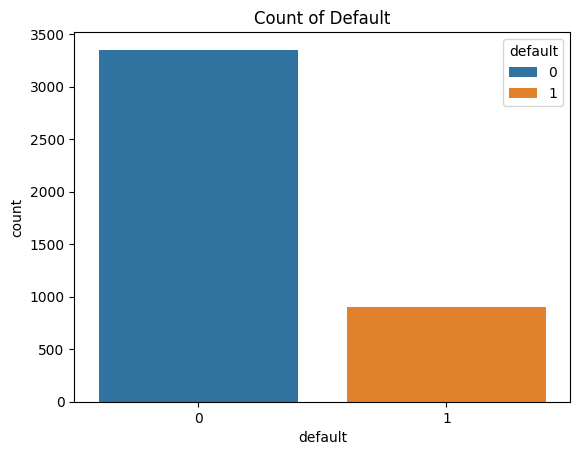

In [ ]:
#Plotting a countplot for the target variable
sns.countplot(x = "default", data = df, hue = 'default')   ## Complete the code to get a countplot of the mentionedd column.
plt.title('Count of Default')
plt.show()

In [ ]:
#Percentage of defaulters
(df.default.sum()/len(df)) * 100

21.2406015037594

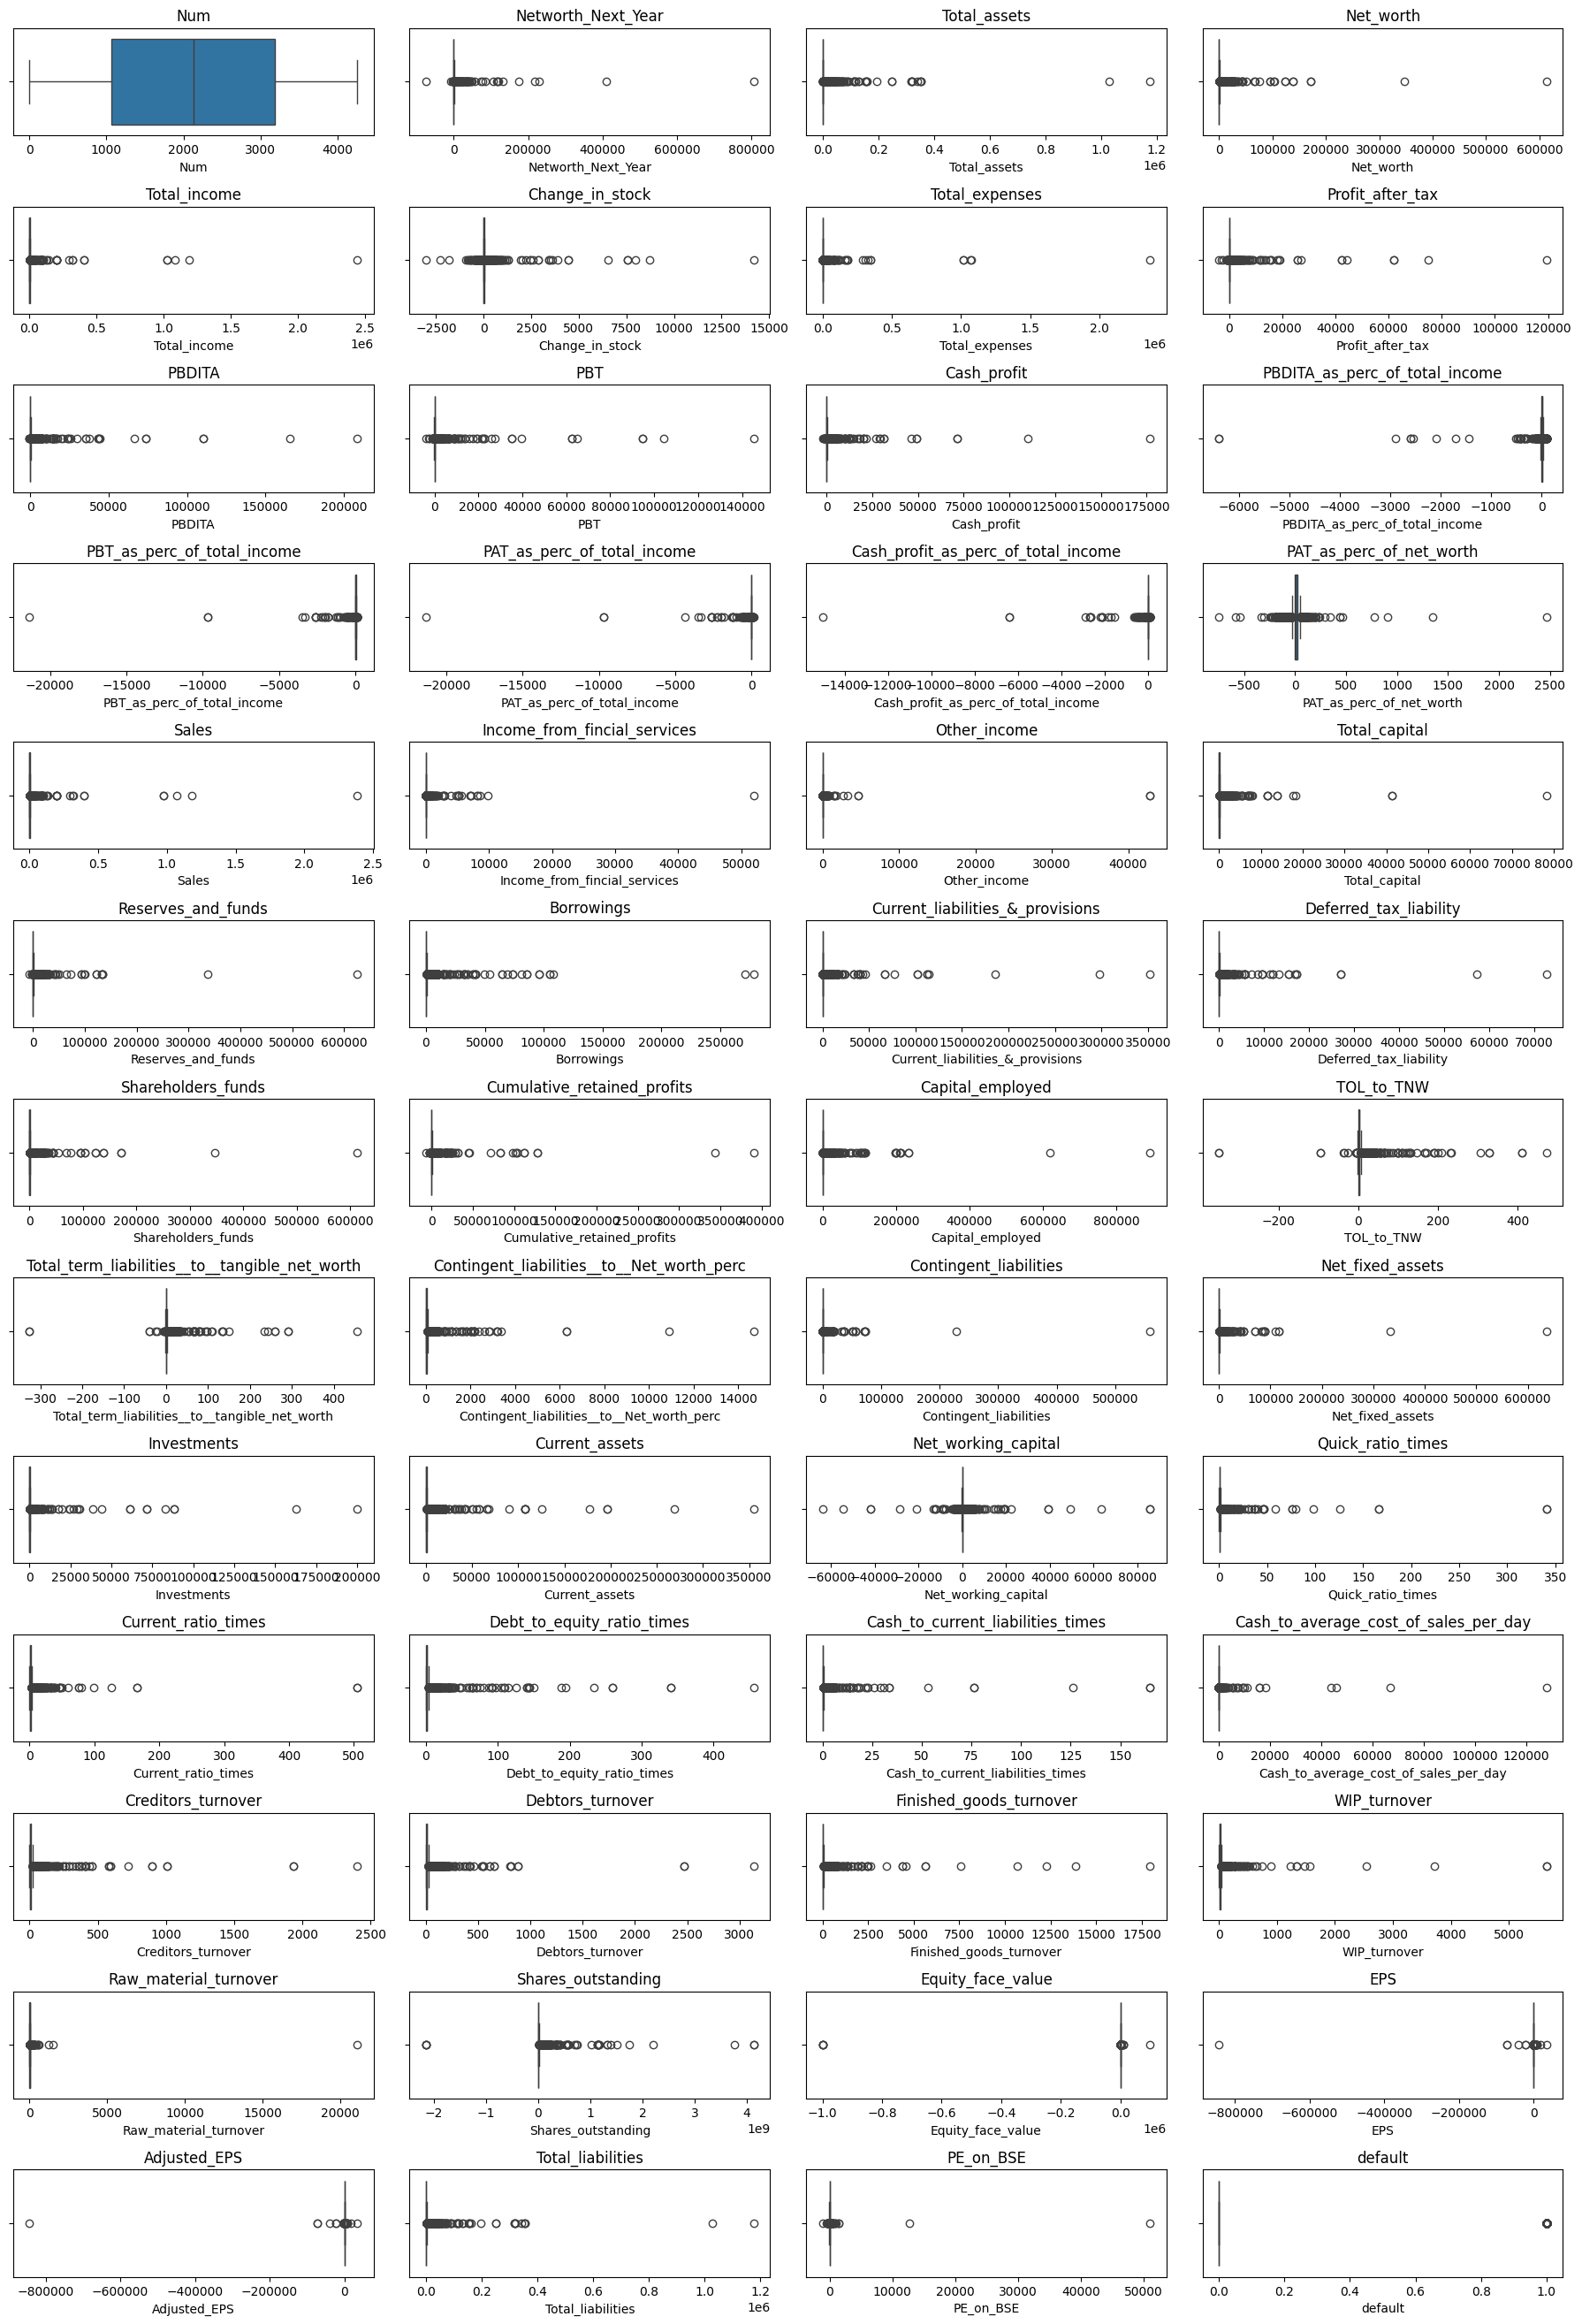

In [ ]:
# Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(data=df, x=variable)  ## Complete the code to get boxplots for all numerical columns
    plt.tight_layout()
    plt.title(variable)


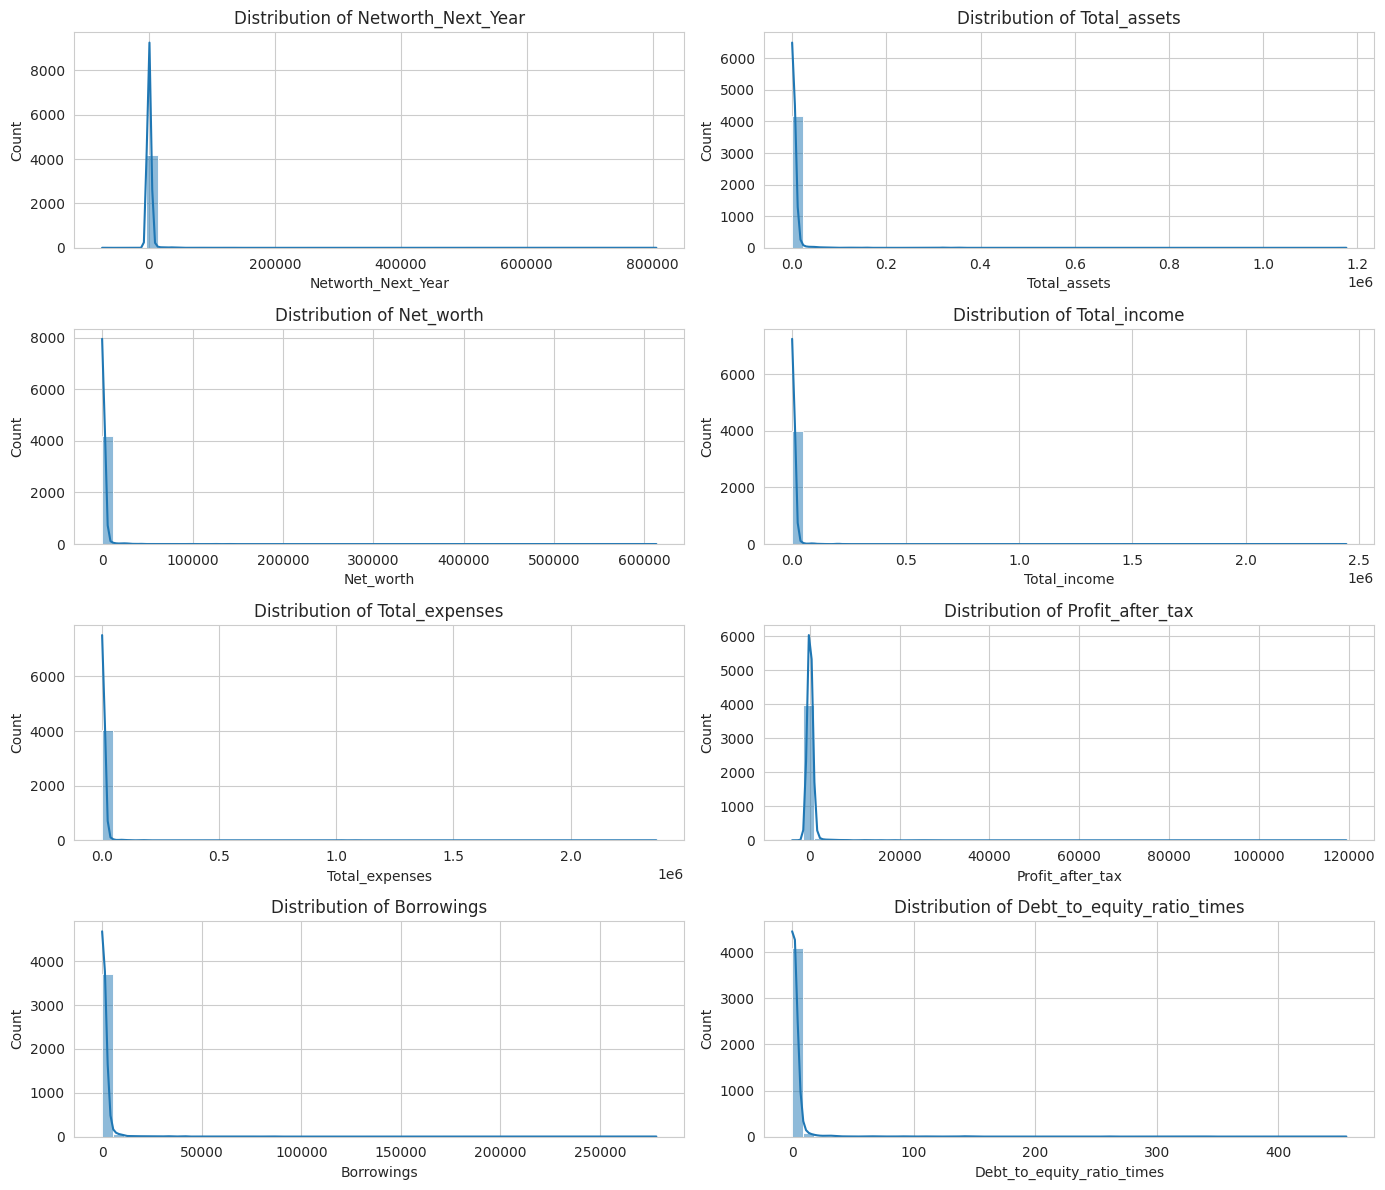

In [ ]:
# Set plot style
sns.set_style("whitegrid")

# Select a few key numerical columns for distribution plots
num_cols = ['Networth_Next_Year', 'Total_assets', 'Net_worth', 'Total_income',
            'Total_expenses', 'Profit_after_tax', 'Borrowings', 'Debt_to_equity_ratio_times']

# Plot histograms
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


## Bivariate Analysis

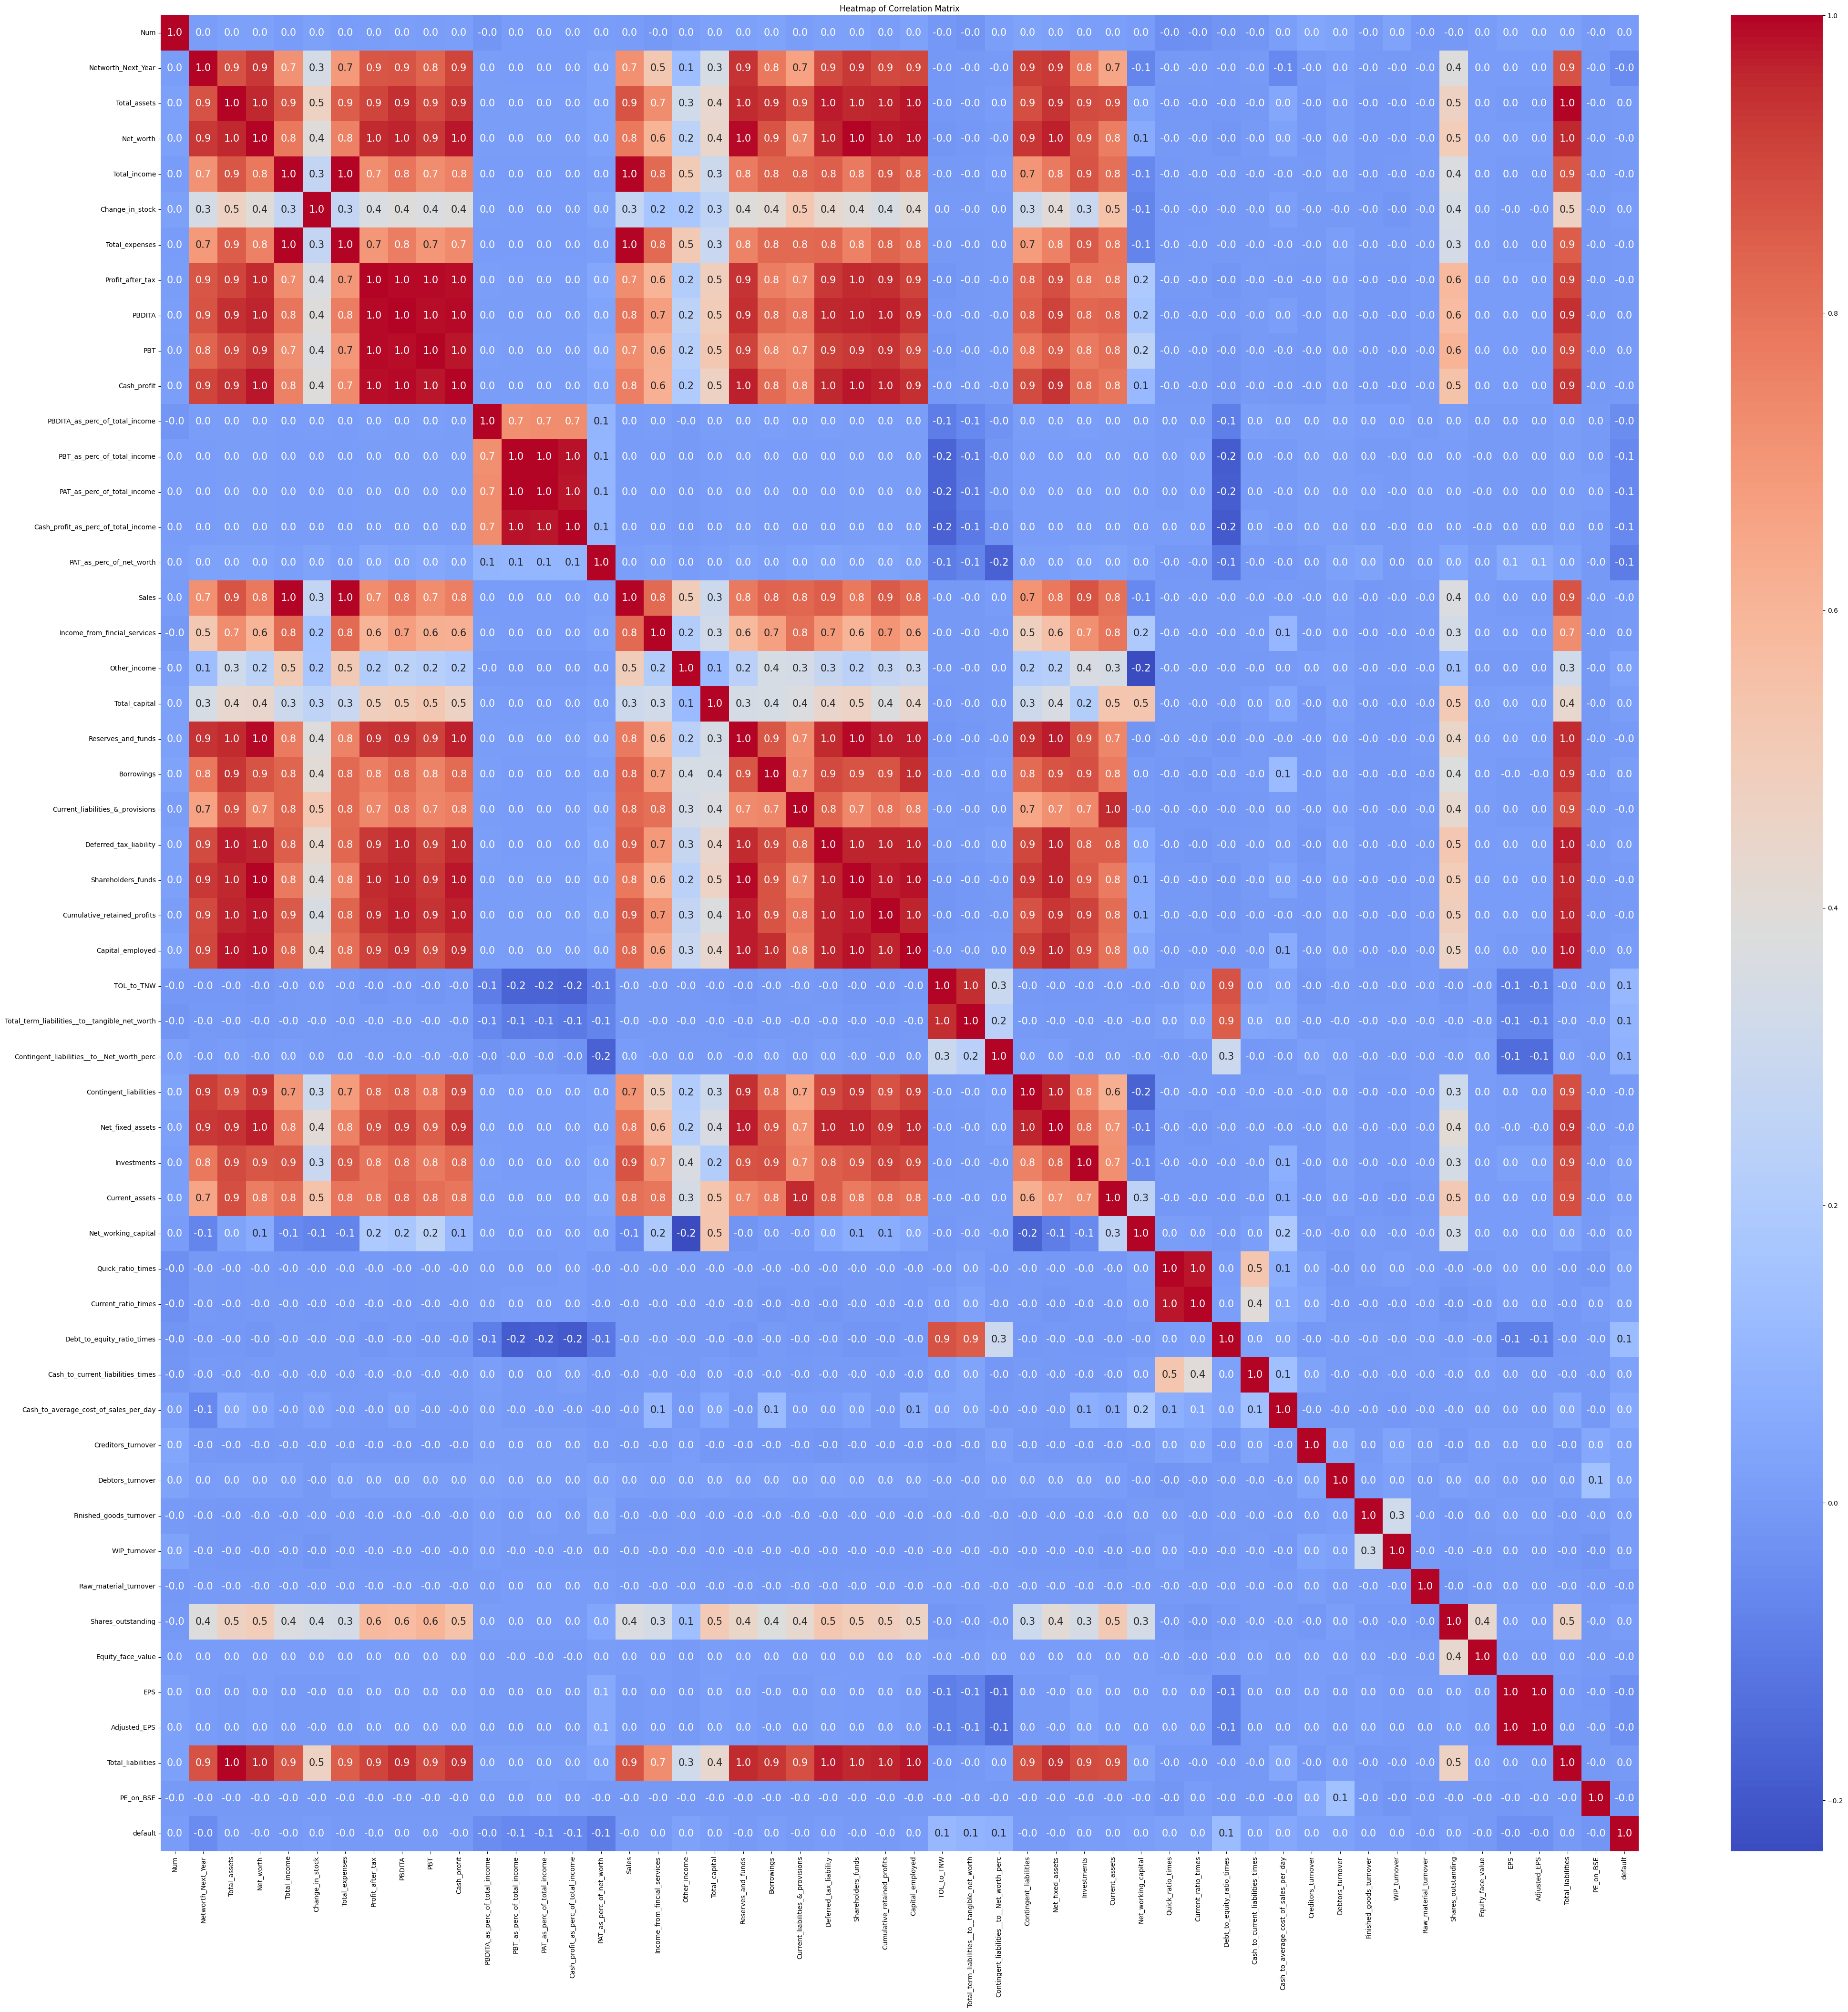

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 15})
plt.title('Heatmap of Correlation Matrix')
plt.show()

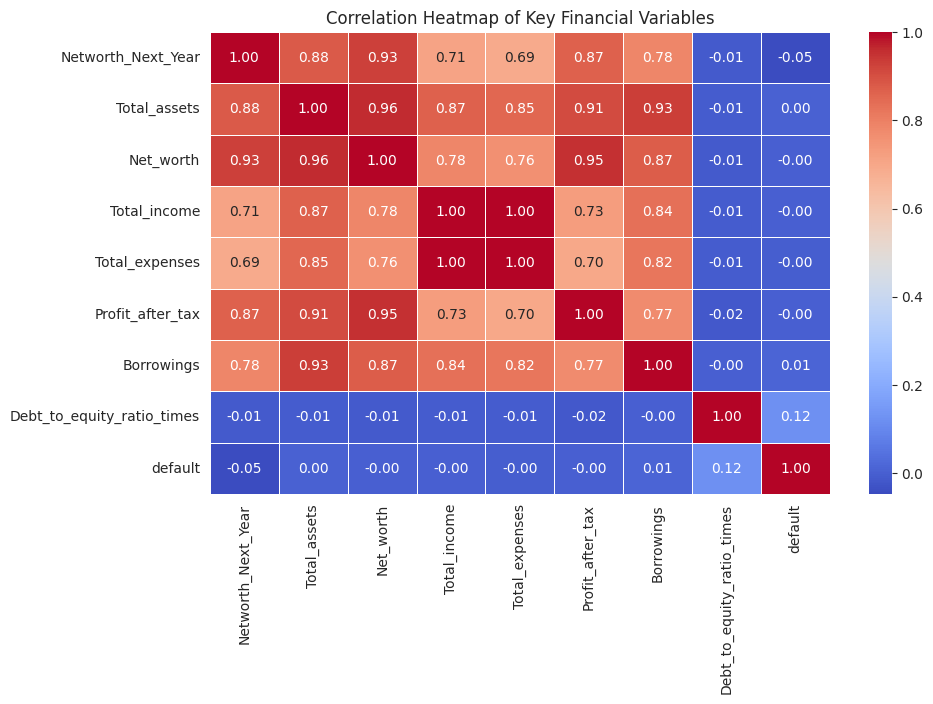

In [ ]:
# Compute correlation matrix for key financial variables
corr_matrix = df[num_cols + ['default']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Financial Variables")
plt.show()


# Data Preprocessing

## Outliers Check

In [ ]:
Company_X = df.drop('default', axis = 1)
Company_Y = df['default']

In [ ]:
Company_X

Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  \
0        1              395.30        827.60     336.50        534.10   
1        2               36.20         67.70      24.30        137.90   
2        3               84.00        238.40      78.90        331.20   
3        4             2041.40       6883.50    1443.30       8448.50   
4        5               41.80         90.90      47.00        388.60   
...    ...                 ...           ...        ...           ...   
4251  4252                0.20          0.40       0.20           NaN   
4252  4253               93.30        159.60      86.70        172.90   
4253  4254              932.20        833.80     664.60       2314.70   
4254  4255               64.60         95.00      48.50        110.50   
4255  4256                0.00        384.60     111.30        345.80   

      Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  ...  \
0               13.50          508.70             38.90  124.40  64.60  ...   
1               -3.70          131.00              3.20    5.50   1.00  ...   
2              -18.10          309.20              3.90   25.80  10.50  ...   
3              212.20         8482.40            178.30  418.40 185.10  ...   
4                3.40          392.70             -0.70    7.20  -0.60  ...   
...               ...             ...               ...     ...    ...  ...   
4251              NaN             NaN               NaN     NaN    NaN  ...   
4252             0.10          169.70              3.30   18.40   3.70  ...   
4253            32.10         2151.60            195.20  348.40 303.00  ...   
4254             4.60          113.50              1.60    9.70   2.60  ...   
4255            11.30          341.70             15.40   57.60  20.70  ...   

      Debtors_turnover  Finished_goods_turnover  WIP_turnover  \
0                 5.65                     3.99          3.37   
1                  NaN                      NaN           NaN   
2                 2.51                    17.67          8.76   
3                 1.91                    18.14         18.62   
4                68.00                    45.87         28.67   
...                ...                      ...           ...   
4251              0.00                      NaN           NaN   
4252              1.80                    11.00          8.28   
4253              6.08                    59.28         31.14   
4254              3.71                    78.99         11.51   
4255              4.71                    53.37          8.33   

      Raw_material_turnover  Shares_outstanding  Equity_face_value   EPS  \
0                     14.87          8760056.00              10.00  4.44   
1                       NaN                 NaN                NaN  0.00   
2                      8.35                 NaN                NaN  0.00   
3                     11.11         10000000.00              10.00 17.60   
4                     19.93           107315.00             100.00 -6.52   
...                     ...                 ...                ...   ...   
4251                   0.00                 NaN                NaN  0.00   
4252                   9.88          8162700.00              10.00  0.42   
4253                   9.87          7479762.00              10.00 26.58   
4254                  14.95                 NaN                NaN  0.00   
4255                   3.74           960000.00              10.00 15.63   

      Adjusted_EPS  Total_liabilities  PE_on_BSE  
0             4.44             827.60        NaN  
1             0.00              67.70        NaN  
2             0.00             238.40        NaN  
3            17.60            6883.50        NaN  
4            -6.52              90.90        NaN  
...            ...                ...        ...  
4251          0.00               0.40        NaN  
4252          0.42             159.60      16.81  
4253         26.58          

In [ ]:
Company_Y

0       0
1       0
2       0
3       0
4       0
       ..
4251    0
4252    0
4253    0
4254    0
4255    1
Name: default, Length: 4256, dtype: int64

### Let's check the number of outliers per column

In [ ]:
# Let's check the number of outliers per column
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [ ]:
((Company_X > UL) | (Company_X < LL)).sum()

Num                                                 0
Networth_Next_Year                                624
Total_assets                                      585
Net_worth                                         595
Total_income                                      508
Change_in_stock                                   750
Total_expenses                                    518
Profit_after_tax                                  712
PBDITA                                            584
PBT                                               704
Cash_profit                                       627
PBDITA_as_perc_of_total_income                    346
PBT_as_perc_of_total_income                       546
PAT_as_perc_of_total_income                       610
Cash_profit_as_perc_of_total_income               426
PAT_as_perc_of_net_worth                          427
Sales                                             500
Income_from_fincial_services                      517
Other_income                                      389
Total_capital                                     551
Reserves_and_funds                                643
Borrowings                                        532
Current_liabilities_&_provisions                  581
Deferred_tax_liability                            406
Shareholders_funds                                588
Cumulative_retained_profits                       699
Capital_employed                                  572
TOL_to_TNW                                        414
Total_term_liabilities__to__tangible_net_worth    406
Contingent_liabilities__to__Net_worth_perc        478
Contingent_liabilities                            393
Net_fixed_assets                                  569
Investments                                       451
Current_assets                                    532
Net_working_capital                               806
Quick_ratio_times                                 371
Current_ratio_times                               397
Debt_to_equity_ratio_times                        381
Cash_to_current_liabilities_times                 539
Cash_to_average_cost_of_sales_per_day             583
Creditors_turnover                                442
Debtors_turnover                                  408
Finished_goods_turnover                           399
WIP_turnover                                      378
Raw_material_turnover                             296
Shares_outstanding                                476
Equity_face_value                                 533
EPS                                               638
Adjusted_EPS                                      694
Total_liabilities                                 585
PE_on_BSE                                         237
dtype: int64

In [ ]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [ ]:
Company_X.isnull().sum()

Num                                                  0
Networth_Next_Year                                 624
Total_assets                                       585
Net_worth                                          595
Total_income                                       739
Change_in_stock                                   1300
Total_expenses                                     683
Profit_after_tax                                   866
PBDITA                                             738
PBT                                                858
Cash_profit                                        781
PBDITA_as_perc_of_total_income                     425
PBT_as_perc_of_total_income                        625
PAT_as_perc_of_total_income                        689
Cash_profit_as_perc_of_total_income                505
PAT_as_perc_of_net_worth                           427
Sales                                              805
Income_from_fincial_services                      1628
Other_income                                      1945
Total_capital                                      556
Reserves_and_funds                                 741
Borrowings                                         963
Current_liabilities_&_provisions                   691
Deferred_tax_liability                            1775
Shareholders_funds                                 588
Cumulative_retained_profits                        744
Capital_employed                                   572
TOL_to_TNW                                         414
Total_term_liabilities__to__tangible_net_worth     406
Contingent_liabilities__to__Net_worth_perc         478
Contingent_liabilities                            1795
Net_fixed_assets                                   701
Investments                                       2166
Current_assets                                     612
Net_working_capital                                843
Quick_ratio_times                                  476
Current_ratio_times                                502
Debt_to_equity_ratio_times                         381
Cash_to_current_liabilities_times                  644
Cash_to_average_cost_of_sales_per_day              683
Creditors_turnover                                 833
Debtors_turnover                                   793
Finished_goods_turnover                           1273
WIP_turnover                                      1142
Raw_material_turnover                              724
Shares_outstanding                                1286
Equity_face_value                                 1343
EPS                                                638
Adjusted_EPS                                       694
Total_liabilities                                  585
PE_on_BSE                                         2864
dtype: int64

In [ ]:
Company_X.isnull().sum().sum()

43724

In [ ]:
Company_X = Company_X.drop(['Num', 'Networth_Next_Year', 'Equity_face_value'], axis = 1)

In [ ]:
Company_X.shape

(4256, 48)

In [ ]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

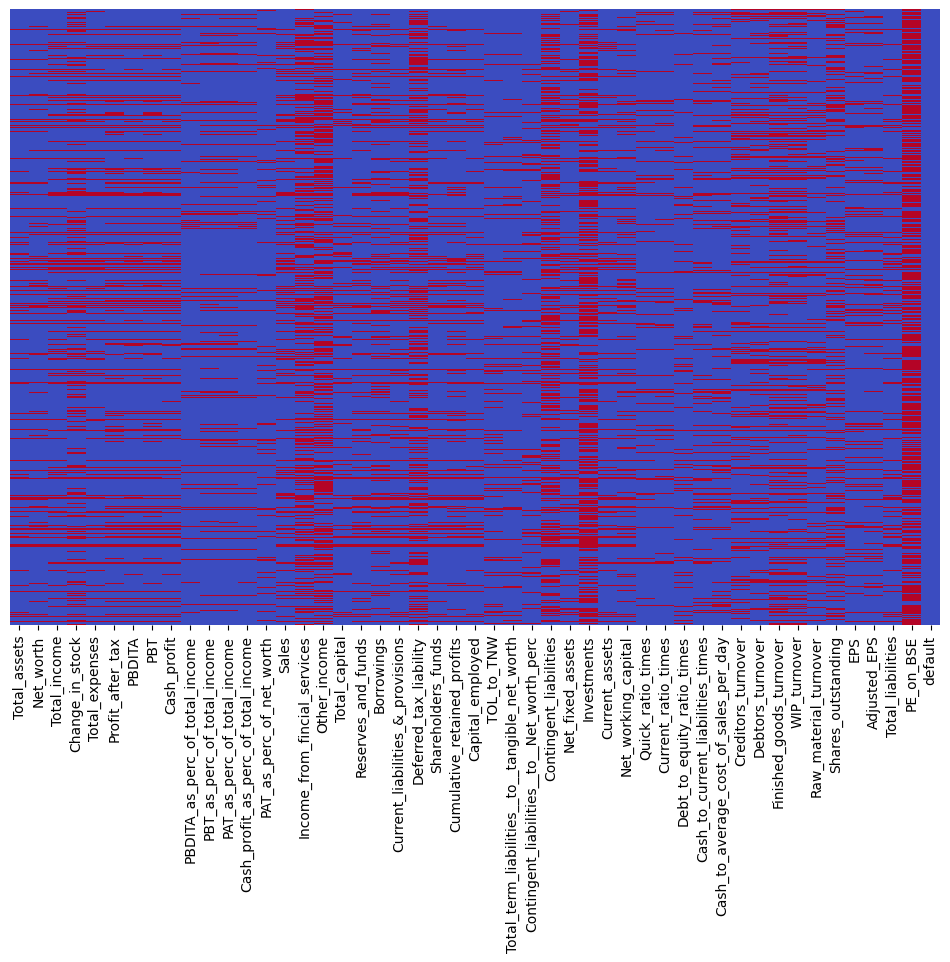

In [ ]:
# Let's visually inspect the missing values in our data
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

### Inspecting total missing values by each row.

In [ ]:
# We should inspect total missing values by each row.
Company_sub1.isnull().sum(axis = 1)

0        4
1        8
2        3
3       21
4        4
        ..
4251    24
4252     5
4253     8
4254     5
4255     2
Length: 4256, dtype: int64

In [ ]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [ ]:
Company_sub1_temp.shape

(1657, 49)

In [ ]:
Company_sub1_temp['default'].value_counts()

default
0    1367
1     290
Name: count, dtype: int64

In [ ]:
290/904

0.32079646017699115

If we consider availability of features for deciding the observations to be considered, we will end up losing more than 65% of the actual defaulters.

In [ ]:
Company_sub1['default'].value_counts()

default
0    3352
1     904
Name: count, dtype: int64

In [ ]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

PE_on_BSE                                        0.67
Investments                                      0.51
Other_income                                     0.46
Contingent_liabilities                           0.42
Deferred_tax_liability                           0.42
Income_from_fincial_services                     0.38
Change_in_stock                                  0.31
Shares_outstanding                               0.30
Finished_goods_turnover                          0.30
WIP_turnover                                     0.27
Borrowings                                       0.23
Profit_after_tax                                 0.20
PBT                                              0.20
Net_working_capital                              0.20
Creditors_turnover                               0.20
Sales                                            0.19
Debtors_turnover                                 0.19
Cash_profit                                      0.18
Cumulative_retained_profits                      0.17
Reserves_and_funds                               0.17
Total_income                                     0.17
PBDITA                                           0.17
Raw_material_turnover                            0.17
Net_fixed_assets                                 0.16
Adjusted_EPS                                     0.16
Current_liabilities_&_provisions                 0.16
PAT_as_perc_of_total_income                      0.16
Cash_to_average_cost_of_sales_per_day            0.16
Total_expenses                                   0.16
Cash_to_current_liabilities_times                0.15
EPS                                              0.15
PBT_as_perc_of_total_income                      0.15
Current_assets                                   0.14
Net_worth                                        0.14
Shareholders_funds                               0.14
Total_liabilities                                0.14
Total_assets                                     0.14
Capital_employed                                 0.13
Total_capital                                    0.13
Cash_profit_as_perc_of_total_income              0.12
Current_ratio_times                              0.12
Contingent_liabilities__to__Net_worth_perc       0.11
Quick_ratio_times                                0.11
PAT_as_perc_of_net_worth                         0.10
PBDITA_as_perc_of_total_income                   0.10
TOL_to_TNW                                       0.10
Total_term_liabilities__to__tangible_net_worth   0.10
Debt_to_equity_ratio_times                       0.09
default                                          0.00
dtype: float64

 Dropping columns with more than 30% missing values

In [ ]:
Company_sub2 = Company_sub1.drop(['PE_on_BSE',
                             'Investments', 'Other_income', 'Contingent_liabilities',
                             'Deferred_tax_liability', 'Income_from_fincial_services',
                                  'Change_in_stock'],
                           axis = 1)

In [ ]:
Company_sub2.shape

(4256, 42)

Segregate the predictors and response

In [ ]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

In [ ]:
# Scale the predictors
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [ ]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

Imputing the remaining missing values

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)

In [ ]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub2), columns = Company_sub2.columns)

In [ ]:
Company_imputed.isnull().sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liabilities_&_provisions                  0
Shareholders_funds                                0
Cumulative_retained_profits                       0
Capital_employed                                  0
TOL_to_TNW                                        0
Total_term_liabilities__to__tangible_net_worth    0
Contingent_liabilities__to__Net_worth_perc        0
Net_fixed_assets                                  0
Current_assets                                    0
Net_working_capital                               0
Quick_ratio_times                                 0
Current_ratio_times                               0
Debt_to_equity_ratio_times                        0
Cash_to_current_liabilities_times                 0
Cash_to_average_cost_of_sales_per_day             0
Creditors_turnover                                0
Debtors_turnover                                  0
Finished_goods_turnover                           0
WIP_turnover                                      0
Raw_material_turnover                             0
Shares_outstanding                                0
EPS                                               0
Adjusted_EPS                                      0
Total_liabilities                                 0
default                                           0
dtype: int64

Inspect possible correlations between independent variables

<Axes: >

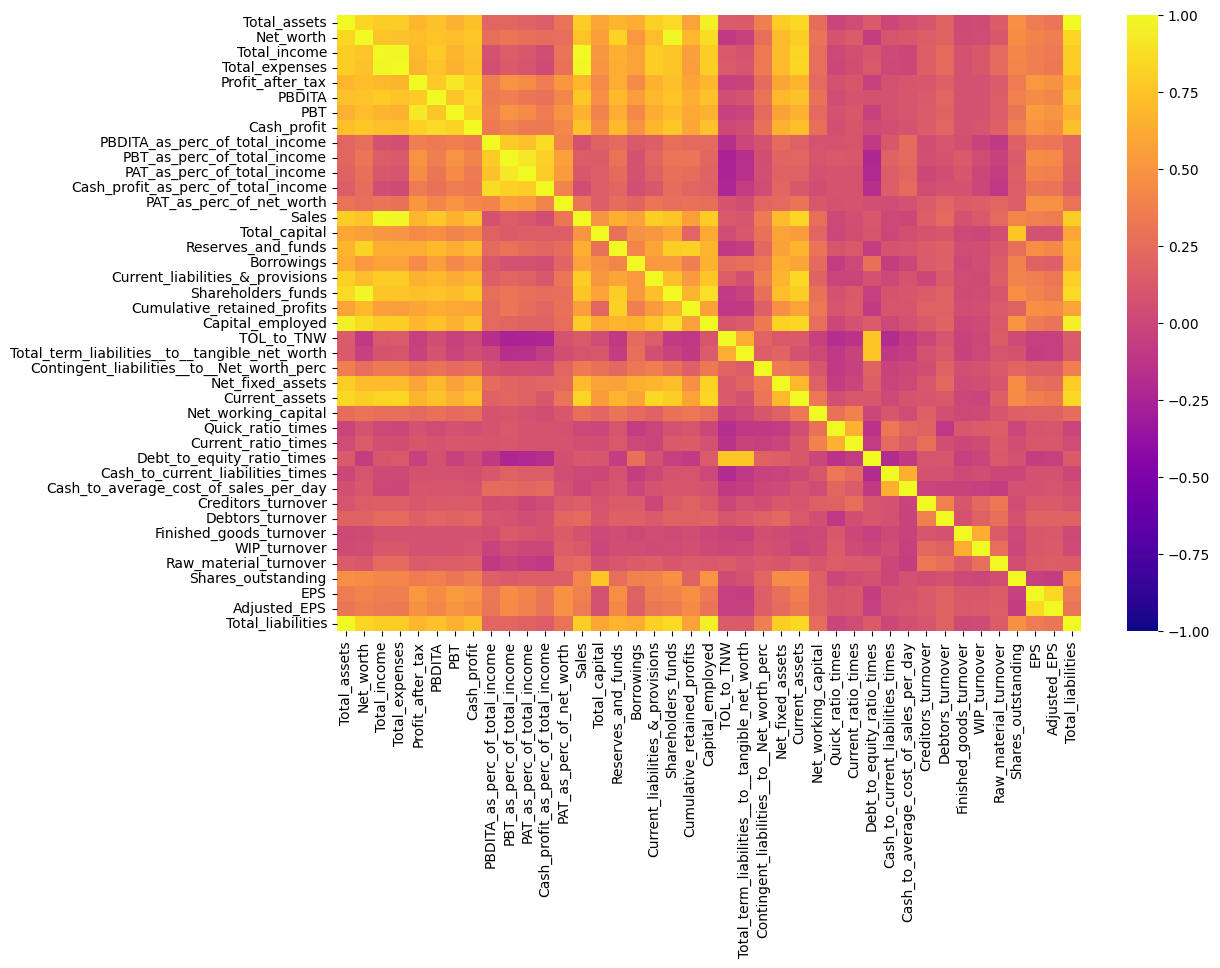

In [ ]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

## Data Preparation for Modeling

In [ ]:
# Seperating target variable from the rest of the data
df_X = Company_imputed.drop(['default'], axis = 1)
df_y = Company_imputed['default']

In [ ]:
df_X.head()

Total_assets  Net_worth  Total_income  Total_expenses  Profit_after_tax  \
0        827.60     336.50        534.10          508.70             38.90   
1         67.70      24.30        137.90          131.00              3.20   
2        238.40      78.90        331.20          309.20              3.90   
3       1751.40     594.76       2070.46         2144.28             73.67   
4         90.90      47.00        388.60          392.70             -0.70   

   PBDITA   PBT  Cash_profit  PBDITA_as_perc_of_total_income  \
0  124.40 64.60        95.20                           23.29   
1    5.50  1.00         3.80                            3.99   
2   25.80 10.50         9.40                            7.79   
3   70.67 93.63       178.00                            4.95   
4    7.20 -0.60         3.90                            1.85   

   PBT_as_perc_of_total_income  ...  Cash_to_average_cost_of_sales_per_day  \
0                        12.10  ...                                   5.41   
1                         0.73  ...                                   1.62   
2                         3.17  ...                                  26.42   
3                         2.19  ...                                  15.93   
4                        -0.15  ...                                   0.85   

   Creditors_turnover  Debtors_turnover  Finished_goods_turnover  \
0               11.60              5.65                     3.99   
1                6.16              8.28                    14.79   
2                2.24              2.51                    17.67   
3                3.48              1.91                    18.14   
4               21.67              6.59                    45.87   

   WIP_turnover  Raw_material_turnover  Shares_outstanding   EPS  \
0          3.37                  14.87          8760056.00  4.44   
1         11.00                   6.53          4460030.90  0.00   
2          8.76                   8.35         10179161.80  0.00   
3         18.62                  11.11         10000000.00 17.60   
4         28.67                  19.93           107315.00 -6.52   

   Adjusted_EPS  Total_liabilities  
0          4.44             827.60  
1          0.00              67.70  
2          0.00             238.40  
3         17.60            1751.40  
4         -6.52              90.90  

[5 rows x 41 columns]

In [ ]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42, stratify = df_y)

In [ ]:
# checking the missing values
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


In [ ]:
X_train.shape

(2979, 41)

In [ ]:
X_test.shape

(1277, 41)

## Scaling the Data

In [ ]:
#Scaling of features is done to bring all the features to the same scale.
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_scaled.head()

Total_assets  Net_worth  Total_income  Total_expenses  Profit_after_tax  \
0         -0.81      -0.72         -0.80           -0.81             -0.49   
1          0.68       0.34          0.74            0.71              3.02   
2         -0.47      -0.37         -0.58           -0.59             -0.26   
3          2.30       0.55         -0.57           -0.57             -0.41   
4         -0.26      -0.40         -0.12           -0.10             -0.39   

   PBDITA   PBT  Cash_profit  PBDITA_as_perc_of_total_income  \
0   -0.65 -0.50        -0.56                            1.05   
1    1.93  1.05         1.65                            0.80   
2   -0.26 -0.14        -0.14                            0.94   
3    0.93 -0.42         1.46                           -0.56   
4   -0.14 -0.35        -0.08                           -0.28   

   PBT_as_perc_of_total_income  ...  Cash_to_average_cost_of_sales_per_day  \
0                         1.29  ...                                  -0.26   
1                         1.62  ...                                  -0.70   
2                         0.76  ...                                   1.85   
3                        -0.08  ...                                   0.04   
4                        -0.48  ...                                  -0.93   

   Creditors_turnover  Debtors_turnover  Finished_goods_turnover  \
0                0.59              0.16                     0.75   
1               -0.02             -0.28                     0.76   
2                0.29             -0.12                     0.42   
3               -1.40             -1.41                     0.21   
4                2.29              0.06                     2.10   

   WIP_turnover  Raw_material_turnover  Shares_outstanding   EPS  \
0          0.37                   0.21               -0.60 -0.18   
1          0.66                  -0.14                1.15 -0.67   
2          0.38                  -0.24               -0.44 -0.58   
3         -0.42                  -1.28                0.94 -0.66   
4          3.06                   0.22               -0.51 -0.08   

   Adjusted_EPS  Total_liabilities  
0         -0.01              -0.81  
1         -0.67               0.68  
2         -0.55              -0.47  
3         -0.66               2.30  
4          0.12              -0.26  

[5 rows x 41 columns]

In [ ]:
X_test_scaled.head()

Total_assets  Net_worth  Total_income  Total_expenses  Profit_after_tax  \
0         -0.07       1.57          1.94            1.94              0.38   
1         -0.86      -0.85         -0.86           -0.86             -0.71   
2         -0.85      -0.89         -0.89           -0.89             -0.78   
3         -0.85      -0.83         -0.88           -0.89             -0.71   
4         -0.60      -0.73         -0.27           -0.24             -0.55   

   PBDITA   PBT  Cash_profit  PBDITA_as_perc_of_total_income  \
0    2.50  0.07         2.42                            0.12   
1   -0.79 -0.71        -0.75                           -1.01   
2   -0.83 -0.76        -0.80                           -0.63   
3   -0.80 -0.71        -0.76                           -0.45   
4   -0.60 -0.49        -0.55                           -0.97   

   PBT_as_perc_of_total_income  ...  Cash_to_average_cost_of_sales_per_day  \
0                        -0.64  ...                                   0.37   
1                        -0.89  ...                                  -1.01   
2                        -0.40  ...                                   0.39   
3                        -0.39  ...                                   0.51   
4                        -0.58  ...                                  -0.39   

   Creditors_turnover  Debtors_turnover  Finished_goods_turnover  \
0                1.06             -0.11                    -0.78   
1               -0.98             -0.42                    -0.60   
2               -1.36             -1.45                    -0.80   
3               -0.55             -1.45                    -1.25   
4                0.68              0.12                    -0.02   

   WIP_turnover  Raw_material_turnover  Shares_outstanding   EPS  \
0         -0.64                  -0.70                1.11 -0.41   
1         -0.08                   0.28               -1.05 -0.66   
2         -0.08                  -1.28               -1.03 -2.25   
3         -1.39                  -1.28                0.35 -0.66   
4          0.24                   1.67               -0.98  1.01   

   Adjusted_EPS  Total_liabilities  
0         -0.32              -0.07  
1         -0.66              -0.86  
2         -2.78              -0.85  
3         -0.66              -0.85  
4          1.56              -0.60  

[5 rows x 41 columns]

#Model Building

## Model Evaluation Criterion

*Metric of Choice*
-


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  # to compute Accuracy
    recall = recall_score(target, y_pred)  # to compute Recall
    precision = precision_score(target, y_pred)  # to compute Precision
    f1 = f1_score(target, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression

In [ ]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)
X_train_with_intercept.head()

const  Total_assets  Net_worth  Total_income  Total_expenses  \
0   1.00         -0.81      -0.72         -0.80           -0.81   
1   1.00          0.68       0.34          0.74            0.71   
2   1.00         -0.47      -0.37         -0.58           -0.59   
3   1.00          2.30       0.55         -0.57           -0.57   
4   1.00         -0.26      -0.40         -0.12           -0.10   

   Profit_after_tax  PBDITA   PBT  Cash_profit  \
0             -0.49   -0.65 -0.50        -0.56   
1              3.02    1.93  1.05         1.65   
2             -0.26   -0.26 -0.14        -0.14   
3             -0.41    0.93 -0.42         1.46   
4             -0.39   -0.14 -0.35        -0.08   

   PBDITA_as_perc_of_total_income  ...  Cash_to_average_cost_of_sales_per_day  \
0                            1.05  ...                                  -0.26   
1                            0.80  ...                                  -0.70   
2                            0.94  ...                                   1.85   
3                           -0.56  ...                                   0.04   
4                           -0.28  ...                                  -0.93   

   Creditors_turnover  Debtors_turnover  Finished_goods_turnover  \
0                0.59              0.16                     0.75   
1               -0.02             -0.28                     0.76   
2                0.29             -0.12                     0.42   
3               -1.40             -1.41                     0.21   
4                2.29              0.06                     2.10   

   WIP_turnover  Raw_material_turnover  Shares_outstanding   EPS  \
0          0.37                   0.21               -0.60 -0.18   
1          0.66                  -0.14                1.15 -0.67   
2          0.38                  -0.24               -0.44 -0.58   
3         -0.42                  -1.28                0.94 -0.66   
4          3.06                   0.22               -0.51 -0.08   

   Adjusted_EPS  Total_liabilities  
0         -0.01              -0.81  
1         -0.67               0.68  
2         -0.55              -0.47  
3         -0.66               2.30  
4          0.12              -0.26  

[5 rows x 42 columns]

In [ ]:
 y_train.reset_index(inplace = True, drop = True)

In [ ]:
X_train_scaled.shape

(2979, 41)

In [ ]:
X_train_with_intercept.shape

(2979, 42)

In [ ]:
# Fitting the Logistic Regression Model with regularization
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())


Optimization terminated successfully.
         Current function value: 0.504625
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2938
Method:                           MLE   Df Model:                           40
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                 0.02438
Time:                        17:06:23   Log-Likelihood:                -1503.3
converged:                       True   LL-Null:                       -1540.8
Covariance Type:            nonrobust   LLR p-value:                 0.0006436
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                               

### Logistic Regression Model - Training Performance

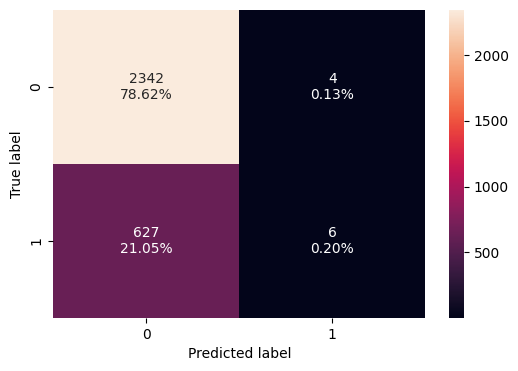

In [ ]:
model_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

In [ ]:
logistic_regression_perf_train = model_performance_classification(LogisticReg, X_train_with_intercept, y_train)
logistic_regression_perf_train

Accuracy  Recall  Precision   F1
0      0.79    0.01       0.60 0.02

### Logistic Regression Model - Test Performance

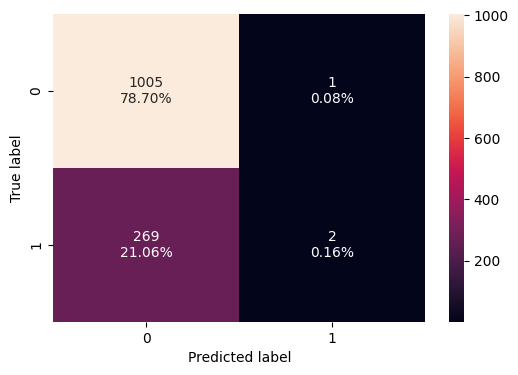

In [ ]:
model_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)  ## Complete the code to create confusion matrix for test data

In [ ]:
logistic_regression_perf_test = model_performance_classification(LogisticReg, X_test_with_intercept, y_test)  ## Complete the code to check performance on test data
logistic_regression_perf_test

Accuracy  Recall  Precision   F1
0      0.79    0.01       0.67 0.01

## Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)  ## Complete the code to define random forest with random state = 42
rf_model = rf_classifier.fit(X_train_scaled, y_train) ## Complete the code to fit random forest on the train data

### Random Forest Model - Training Performance

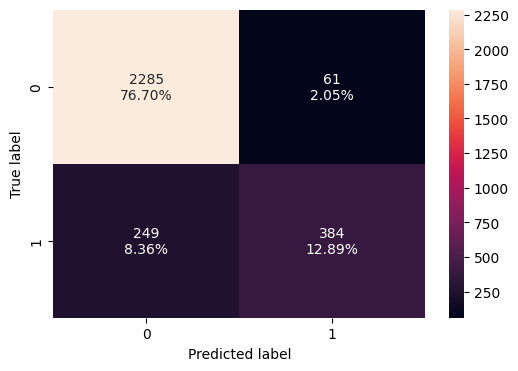

In [ ]:
model_confusion_matrix(rf_model, X_train_scaled, y_train)

In [ ]:
random_forest_perf_train = model_performance_classification(rf_model, X_train_scaled, y_train)
random_forest_perf_train

Accuracy  Recall  Precision   F1
0      0.90    0.61       0.86 0.71

### Random Forest Model - Test Performance

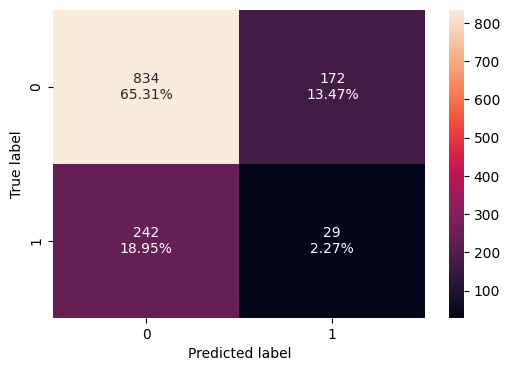

In [ ]:
model_confusion_matrix(rf_model, X_test_scaled, y_test)  ## Complete the code to create confusion matrix for test data

In [ ]:
random_forest_perf_test = model_performance_classification(rf_model, X_test_scaled, y_test)  ## Complete the code to check performance on test data
random_forest_perf_test

Accuracy  Recall  Precision   F1
0      0.68    0.11       0.14 0.12

# Model Performance Improvement

## Model Performance Improvement - Logistic Regression

In [ ]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [ ]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_scaled)  ## Complete the code to calculate VIF for the scaled X_train data

print("Variance Inflation Factors:")
vif_result

Variance Inflation Factors:


Variable   VIF
0                                     Total_assets   inf
1                                        Net_worth 39.03
2                                     Total_income 89.03
3                                   Total_expenses 52.13
4                                 Profit_after_tax  8.54
5                                           PBDITA  5.52
6                                              PBT  8.56
7                                      Cash_profit  6.05
8                   PBDITA_as_perc_of_total_income  4.85
9                      PBT_as_perc_of_total_income  9.29
10                     PAT_as_perc_of_total_income  7.43
11             Cash_profit_as_perc_of_total_income  5.50
12                        PAT_as_perc_of_net_worth  2.09
13                                           Sales 92.34
14                                   Total_capital  3.48
15                              Reserves_and_funds  5.01
16                                      Borrowings  2.21
17                Current_liabilities_&_provisions  5.24
18                              Shareholders_funds 43.22
19                     Cumulative_retained_profits  3.32
20                                Capital_employed 19.73
21                                      TOL_to_TNW  2.80
22  Total_term_liabilities__to__tangible_net_worth  2.69
23      Contingent_liabilities__to__Net_worth_perc  1.28
24                                Net_fixed_assets  3.87
25                                  Current_assets  7.48
26                             Net_working_capital  1.42
27                               Quick_ratio_times  2.14
28                             Current_ratio_times  2.05
29                      Debt_to_equity_ratio_times  3.69
30               Cash_to_current_liabilities_times  1.96
31           Cash_to_average_cost_of_sales_per_day  1.90
32                              Creditors_turnover  1.48
33                                Debtors_turnover  1.45
34                         Finished_goods_turnover  1.76
35                                    WIP_turnover  1.94
36                           Raw_material_turnover  1.36
37                              Shares_outstanding  2.64
38                                             EPS  4.15
39                                    Adjusted_EPS  3.90
40                               Total_liabilities   inf

In [ ]:
# Sort VIF values in descending order
vif_result_sorted = vif_result.sort_values(by='VIF', ascending=False)

print("Variance Inflation Factors (Sorted):")
vif_result_sorted


Variance Inflation Factors (Sorted):


Variable   VIF
0                                     Total_assets   inf
40                               Total_liabilities   inf
13                                           Sales 92.34
2                                     Total_income 89.03
3                                   Total_expenses 52.13
18                              Shareholders_funds 43.22
1                                        Net_worth 39.03
20                                Capital_employed 19.73
9                      PBT_as_perc_of_total_income  9.29
6                                              PBT  8.56
4                                 Profit_after_tax  8.54
25                                  Current_assets  7.48
10                     PAT_as_perc_of_total_income  7.43
7                                      Cash_profit  6.05
5                                           PBDITA  5.52
11             Cash_profit_as_perc_of_total_income  5.50
17                Current_liabilities_&_provisions  5.24
15                              Reserves_and_funds  5.01
8                   PBDITA_as_perc_of_total_income  4.85
38                                             EPS  4.15
39                                    Adjusted_EPS  3.90
24                                Net_fixed_assets  3.87
29                      Debt_to_equity_ratio_times  3.69
14                                   Total_capital  3.48
19                     Cumulative_retained_profits  3.32
21                                      TOL_to_TNW  2.80
22  Total_term_liabilities__to__tangible_net_worth  2.69
37                              Shares_outstanding  2.64
16                                      Borrowings  2.21
27                               Quick_ratio_times  2.14
12                        PAT_as_perc_of_net_worth  2.09
28                             Current_ratio_times  2.05
30               Cash_to_current_liabilities_times  1.96
35                                    WIP_turnover  1.94
31           Cash_to_average_cost_of_sales_per_day  1.90
34                         Finished_goods_turnover  1.76
32                              Creditors_turnover  1.48
33                                Debtors_turnover  1.45
26                             Net_working_capital  1.42
36                           Raw_material_turnover  1.36
23      Contingent_liabilities__to__Net_worth_perc  1.28

In [ ]:
high_vif_columns = []
for i, row in vif_result.iterrows():
    if row['VIF'] >= 5:
        high_vif_columns.append(row['Variable'])
high_vif_columns

['Total_assets',
 'Net_worth',
 'Total_income',
 'Total_expenses',
 'Profit_after_tax',
 'PBDITA',
 'PBT',
 'Cash_profit',
 'PBT_as_perc_of_total_income',
 'PAT_as_perc_of_total_income',
 'Cash_profit_as_perc_of_total_income',
 'Sales',
 'Reserves_and_funds',
 'Current_liabilities_&_provisions',
 'Shareholders_funds',
 'Capital_employed',
 'Current_assets',
 'Total_liabilities']

In [ ]:
# Dropping columns with VIF > 5
X_train_scaled.drop(columns = high_vif_columns, axis=1, inplace=True)
X_test_scaled.drop(columns = high_vif_columns, axis=1, inplace=True)

In [ ]:
X_train_scaled.shape

(2979, 23)

In [ ]:
X_test_scaled.shape

(1277, 23)

In [ ]:
X_train_new_with_intercept = SM.add_constant(X_train_scaled)
X_test_new_with_intercept = SM.add_constant(X_test_scaled)

In [ ]:
# Retraining Logistic Regression Model with new data
LogisticReg_improved = SM.Logit(y_train, X_train_new_with_intercept).fit() ## Complete the code to fir Logistic Regression Model on new train data with intercept
print(LogisticReg_improved.summary())

Optimization terminated successfully.
         Current function value: 0.507474
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2955
Method:                           MLE   Df Model:                           23
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                 0.01887
Time:                        17:06:37   Log-Likelihood:                -1511.8
converged:                       True   LL-Null:                       -1540.8
Covariance Type:            nonrobust   LLR p-value:                 7.049e-05
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                               

In [ ]:
# Finding Optimal Threshold value
logit_y_pred = LogisticReg_improved.predict(X_train_new_with_intercept)
fpr, tpr, thresholds = roc_curve(y_train, logit_y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
optimal_threshold_logit

0.244

In [ ]:
# prompt: roc_auc = _______(y_train, logit_y_pred)  ## Complete the code to get roc_auc score

roc_auc = roc_auc_score(y_train, logit_y_pred)


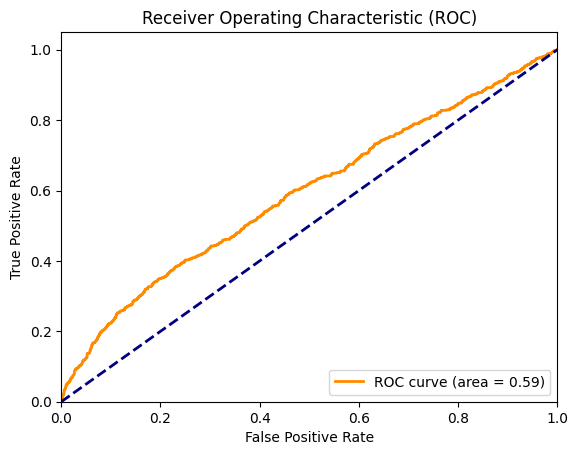

In [ ]:
roc_auc = roc_auc_score(y_train, logit_y_pred)  ## Complete the code to get roc_auc score
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Performance - Training Set

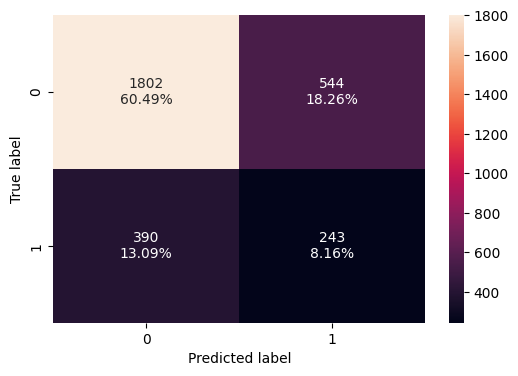

In [ ]:
model_confusion_matrix(LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit)

In [ ]:
logistic_regression_tuned_perf_train = model_performance_classification(
    LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit
)
logistic_regression_tuned_perf_train

Accuracy  Recall  Precision   F1
0      0.69    0.38       0.31 0.34

### Logistic Regression Performance - Test Set

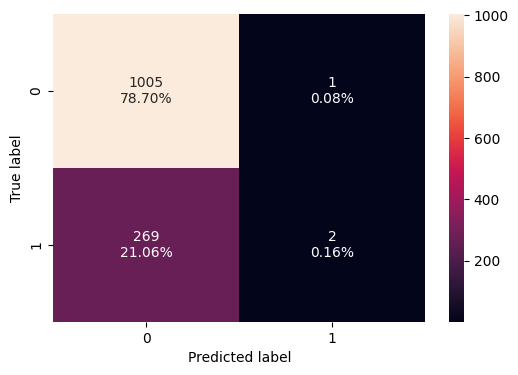

In [ ]:
model_confusion_matrix(LogisticReg, X_test_with_intercept, y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
logistic_regression_tuned_perf_test = model_performance_classification(LogisticReg, X_test_with_intercept, y_test)  ## Complete the code to check performance on test data
logistic_regression_tuned_perf_test

Accuracy  Recall  Precision   F1
0      0.79    0.01       0.67 0.01

## Model Performance Improvement - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Optimized parameter grid
param_dist = {
    'n_estimators': [100, 200],  # Reduce number of trees for faster training
    'max_depth': [5, 7],  # Reduce options
    'min_samples_split': [2, 5],  # Reduce combinations
    'min_samples_leaf': [5, 6],  # Reduce combinations
}

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Use RandomizedSearchCV for faster execution
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Randomly test 10 combinations instead of exhaustive search
    cv=3,  # Reduce cross-validation folds for speed
    scoring='recall',
    n_jobs=-1,
    verbose=1,  # Show progress
    random_state=42
)

# Train the model
random_search.fit(X_train_scaled, y_train)

# Display best parameters
print("Best parameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 5}


In [ ]:
# Access the best trained RandomForestClassifier model
best_rf_classifier = random_search.best_estimator_

# Get parameters of the best model
params_used = best_rf_classifier.get_params()

# Print the parameters
print("Parameters used in the Random Forest Classifier:")
for param_name, param_value in params_used.items():
    print(f"{param_name}: {param_value}")


Parameters used in the Random Forest Classifier:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 5
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 5
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


### Random Forest Performance - Training Set

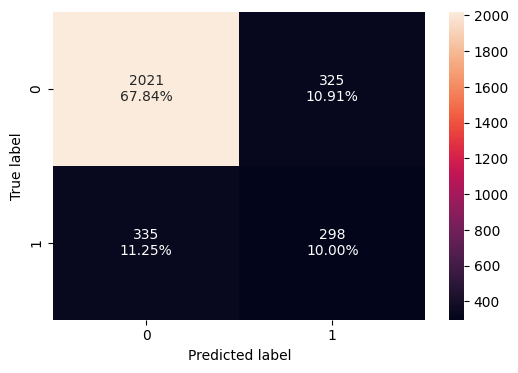

In [ ]:
model_confusion_matrix(best_rf_classifier, X_train_scaled, y_train)

In [ ]:
random_forest_tuned_perf_train = model_performance_classification(best_rf_classifier, X_train_scaled, y_train)
random_forest_tuned_perf_train

Accuracy  Recall  Precision   F1
0      0.78    0.47       0.48 0.47

### Random Forest Performance - Test Set

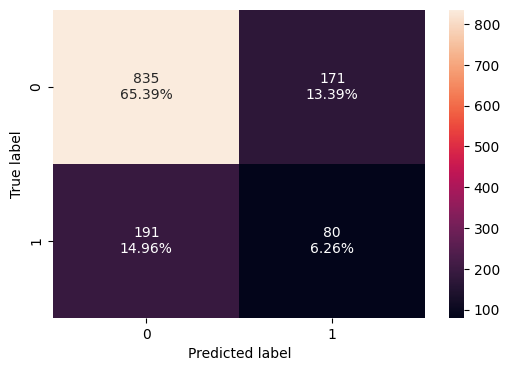

In [ ]:
model_confusion_matrix(best_rf_classifier, X_test_scaled, y_test)  ## Complete the code to create confusion matrix for test data

In [ ]:
random_forest_tuned_perf_test = model_performance_classification(best_rf_classifier, X_test_scaled, y_test)
random_forest_tuned_perf_test

Accuracy  Recall  Precision   F1
0      0.72    0.30       0.32 0.31

# Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_regression_perf_train.T,
        logistic_regression_tuned_perf_train.T,
        random_forest_perf_train.T,
        random_forest_tuned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression  Tuned Logistic Regression  Random Forest  \
Accuracy                  0.79                       0.69           0.90   
Recall                    0.01                       0.38           0.61   
Precision                 0.60                       0.31           0.86   
F1                        0.02                       0.34           0.71   

           Tuned Random Forest  
Accuracy                  0.78  
Recall                    0.47  
Precision                 0.48  
F1                        0.47

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf_test.T,
        logistic_regression_tuned_perf_test.T,
        random_forest_perf_test.T,
        random_forest_tuned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logistic Regression  Tuned Logistic Regression  Random Forest  \
Accuracy                  0.79                       0.79           0.68   
Recall                    0.01                       0.01           0.11   
Precision                 0.67                       0.67           0.14   
F1                        0.01                       0.01           0.12   

           Tuned Random Forest  
Accuracy                  0.72  
Recall                    0.30  
Precision                 0.32  
F1                        0.31

In [ ]:
feature_names = X_train.columns
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Conclusions and Recommendations

Strengthening Financial Risk Management:

Companies with high debt-to-equity ratios should focus on reducing liabilities through optimized capital structuring.

Regular liquidity assessments (current and quick ratios) should be conducted to prevent cash flow shortages.



Creditworthiness-Based Investment Decisions:

Investors should prioritize businesses with strong profitability indicators (PBDITA, PBT, and PAT margins).

Avoid investments in companies with persistent negative net worth trends.



Debt Restructuring for High-Risk Companies:

Businesses at risk of default should consider alternative financing options (e.g., equity financing vs. excessive debt reliance).

Establish structured debt repayment plans to enhance financial stability.



Automation of Financial Monitoring Systems:

Implement AI-driven early warning systems to detect signs of financial distress.

Continuous tracking of debt management practices to ensure timely corrective actions.


___

- By Nabankur Ray
[PGP-DSBA]

# **Problem Statement - Part B**

## Context

Investors face market risk, arising from asset price fluctuations due to economic events, geopolitical developments, and investor sentiment changes. Understanding and analyzing this risk is crucial for informed decision-making and optimizing investment strategies.

## Objective

The objective of this analysis is to conduct Market Risk Analysis on a portfolio of Indian stocks using Python. It uses historical stock price data to understand market volatility and riskiness. Using statistical measures like mean and standard deviation, investors gain a deeper understanding of individual stocks' performance and portfolio variability.

Through this analysis, investors can aim to achieve the following objectives:

1. Risk Assessment: Analyze the historical volatility of individual stocks and the overall portfolio.
2. Portfolio Optimization: Use Market Risk Analysis insights to enhance risk-adjusted returns.
3. Performance Evaluation: Assess portfolio management strategies' effectiveness in mitigating market risk.
4. Portfolio Performance Monitoring: Monitor portfolio performance over time and adjust as market conditions and risk preferences change.

## Data Dictionary

The dataset contains weekly stock price data for 5 Indian stocks over an 8-year period. The dataset enables us to analyze the historical performance of individual stocks and the overall market dynamics.

# Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/My Drive/FRA-Market_Risk_Data_coded.csv')
df.head()

Mounted at /content/drive/


Date  ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
0  28-03-2016          217            316          386          114       173
1  04-04-2016          218            302          386          121       171
2  11-04-2016          215            308          374          120       171
3  18-04-2016          223            320          408          122       172
4  25-04-2016          214            319          418          122       175

# Overview of the Dataset

In [ ]:
# View the dimension of the data
df.shape

(418, 6)

* There are **418 rows** and **6 Columns** are present in the given datasets.

In [ ]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC Limited    418 non-null    int64 
 2   Bharti Airtel  418 non-null    int64 
 3   Tata Motors    418 non-null    int64 
 4   DLF Limited    418 non-null    int64 
 5   Yes Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


* It can be observed that no columns have less entries (less than 418 rows) which indicates that there are no missing values in the given dataset.

* There are attributes of different types (int, object) in the given dataset.

* There are 5 numerical columns in the data, 1 object Column(Date), which need to be converted to DateTime format.


In [ ]:
# checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# checking for missing values in the data
df.isnull().sum()

Date             0
ITC Limited      0
Bharti Airtel    0
Tata Motors      0
DLF Limited      0
Yes Bank         0
dtype: int64

• There is no missing or null values.

• There is no duplicate values.

In [ ]:
# Statistical summary of the data
df.describe().T

count        mean         std    min     25%    50%     75%  \
ITC Limited    418.0  278.964115   75.114405  156.0  224.25  265.5  304.00   
Bharti Airtel  418.0  528.260766  226.507879  261.0  334.00  478.0  706.75   
Tata Motors    418.0  368.617225  182.024419   65.0  186.00  399.5  466.00   
DLF Limited    418.0  276.827751  156.280781  110.0  166.25  213.0  360.50   
Yes Bank       418.0  124.442584  130.090884   11.0   16.00   30.0  249.75   

                  max  
ITC Limited     493.0  
Bharti Airtel  1236.0  
Tata Motors    1035.0  
DLF Limited     928.0  
Yes Bank        397.0

Stock Price Range & Central Tendency:

* Bharti Airtel has the highest average stock price (₹528.26), followed by Tata Motors (₹368.62), ITC Limited (₹278.96), DLF Limited (₹276.83), and Yes Bank (₹124.44).
* Yes Bank has the lowest median stock price (₹30), indicating a significant decline compared to others.

Volatility & Risk Assessment:

* Bharti Airtel (₹226.51) and Tata Motors (₹182.02) exhibit the highest standard deviation, indicating greater price fluctuations.
* Yes Bank has the highest price volatility relative to its mean (high standard deviation compared to its lower stock value).
* ITC Limited and DLF Limited show moderate fluctuations, making them relatively stable investments.

Minimum & Maximum Stock Prices:

* Bharti Airtel reached the highest maximum stock price (₹1236), while Yes Bank had the lowest recorded price (₹11).
* Tata Motors and DLF Limited show significant growth potential, given their high max values (₹1035 & ₹928, respectively).

In [ ]:
# Convert 'Date' column from object to datetimeobject to DateTime
df['Date']  = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           418 non-null    datetime64[ns]
 1   ITC Limited    418 non-null    int64         
 2   Bharti Airtel  418 non-null    int64         
 3   Tata Motors    418 non-null    int64         
 4   DLF Limited    418 non-null    int64         
 5   Yes Bank       418 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 19.7 KB


In [ ]:
df.head()

Date  ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
0 2016-03-28          217            316          386          114       173
1 2016-04-04          218            302          386          121       171
2 2016-04-11          215            308          374          120       171
3 2016-04-18          223            320          408          122       172
4 2016-04-25          214            319          418          122       175

# Stock Price Analysis

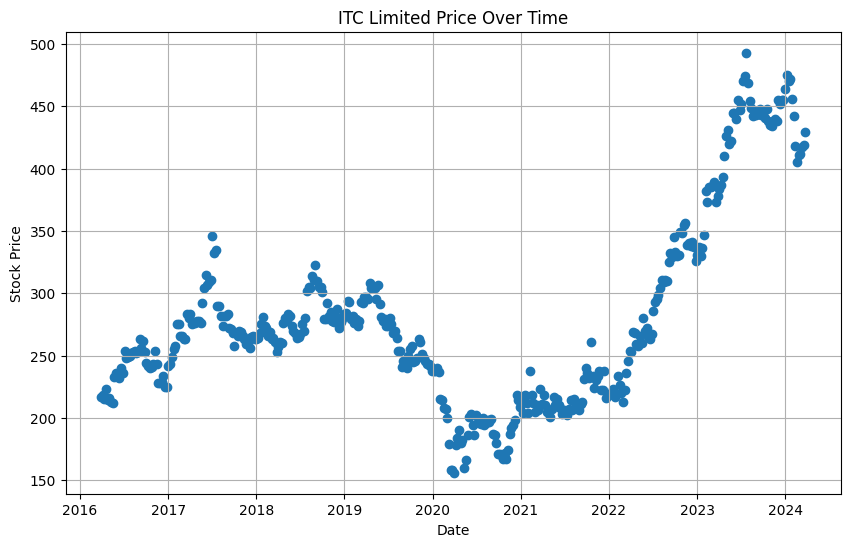

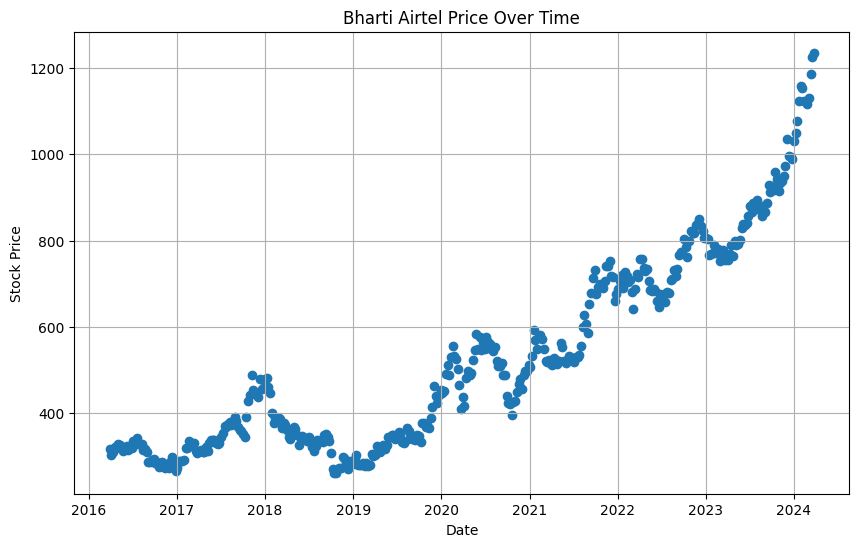

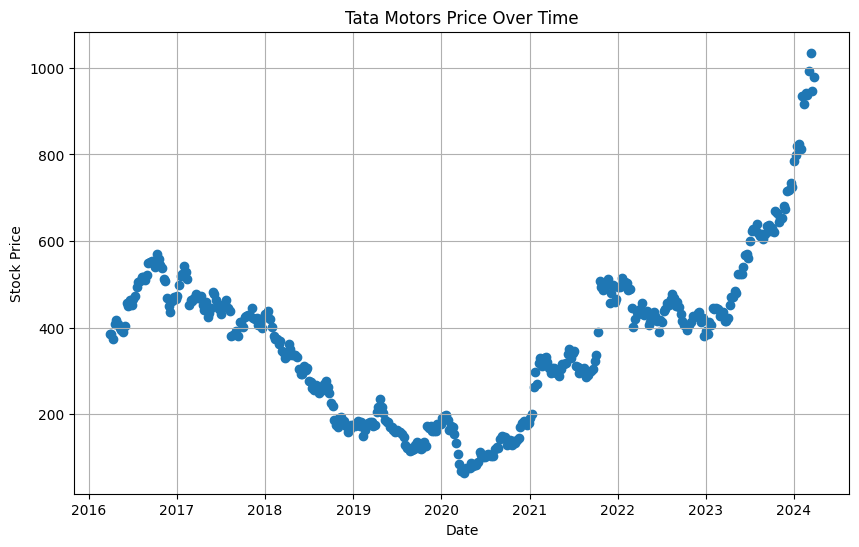

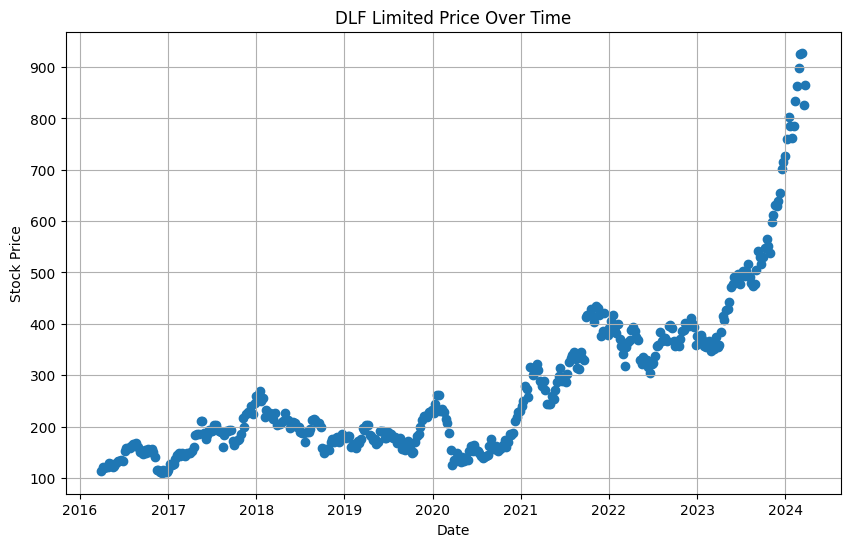

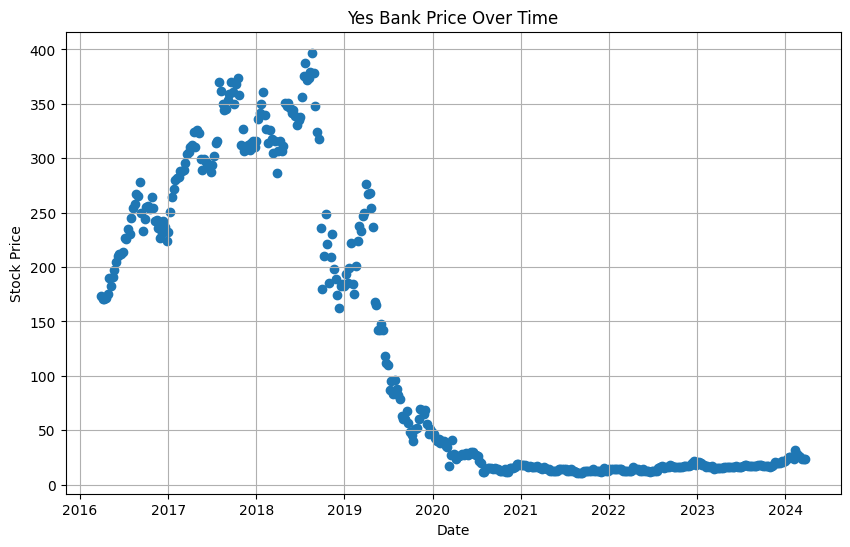

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns

# Plotting scatter plot for all the columns against Date
for i, stock in enumerate(numeric_columns):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Date'], df[stock])
    plt.title(f'{stock} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()


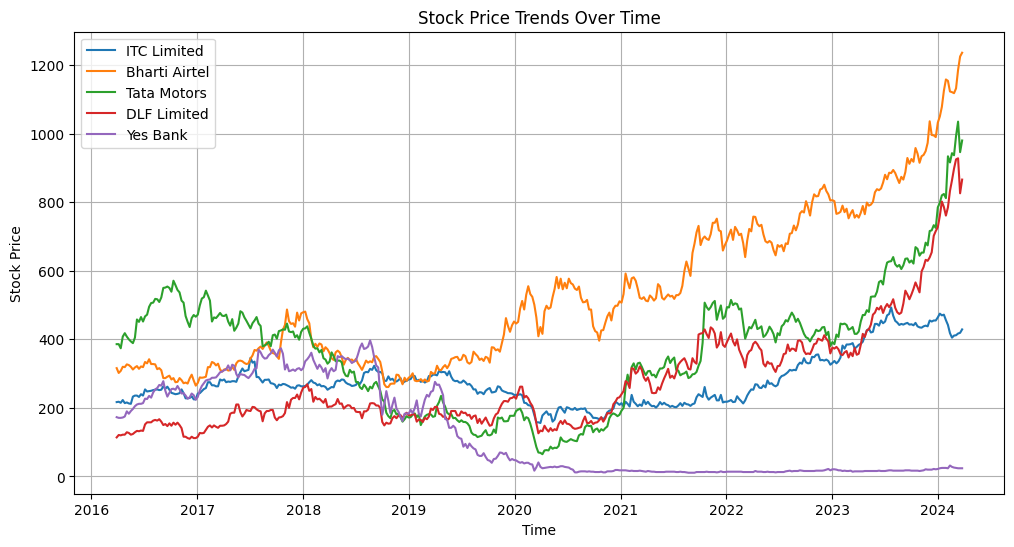

In [ ]:
# Set the date column as the index
df.set_index('Date', inplace=True)

# Plot stock prices over time
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Trends Over Time")
plt.legend()
plt.grid()
plt.show()


**Inference**
-

The stock price graph reveals key trends over the 8-year period:

* Volatility Differences: Some stocks, such as Tata Motors and Yes Bank, show significant fluctuations, indicating high volatility.
* Diverging Performance: ITC Limited and Bharti Airtel appear relatively stable compared to others.
* Possible Market Events: Sharp drops or spikes in certain stocks suggest major market events impacting specific companies or sectors.

# Returns and Volatility Analysis


## Return Calculation

In [ ]:
# Return_of_Stocks =  np.log(df.drop(['Date'],axis=1)).diff(axis = 0)

# Set the display options to show all rows and columns
# pd.set_option('display.max_rows', None)  # Set to None to display all rows

# Return_of_Stocks

In [ ]:
Return_of_Stocks =  np.log(df).diff(axis = 0)

# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Set to None to display all rows

Return_of_Stocks

ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
Date                                                                      
2016-03-28          NaN            NaN          NaN          NaN       NaN
2016-04-04     0.004598      -0.045315     0.000000     0.059592 -0.011628
2016-04-11    -0.013857       0.019673    -0.031582    -0.008299  0.000000
2016-04-18     0.036534       0.038221     0.087011     0.016529  0.005831
2016-04-25    -0.041196      -0.003130     0.024214     0.000000  0.017291
2016-05-02     0.009302       0.024769    -0.024214     0.055791  0.082238
2016-05-09    -0.013986      -0.006135    -0.019803    -0.015625 -0.037538
2016-05-16    -0.004706      -0.015504    -0.015114    -0.040166  0.042787
2016-05-23     0.094452      -0.025318    -0.012772     0.016261  0.030930
2016-05-30     0.012793       0.019048     0.040308     0.039531  0.039806
2016-06-06     0.000000       0.012500     0.122982     0.030537  0.024098
2016-06-13    -0.017094      -0.025159    -0.015402    -0.007547  0.009479
2016-06-20     0.033902       0.022048     0.030570     0.015038  0.000000
2016-06-27    -0.016807      -0.006250    -0.028355    -0.007491  0.009390
2016-07-04     0.073502       0.045950     0.032647     0.133531  0.058974
2016-07-11    -0.023906      -0.012048     0.010650     0.038715 -0.004415
2016-07-18     0.004024       0.035718     0.047579     0.000000  0.039051
2016-07-25     0.004008      -0.041797     0.021979     0.000000 -0.021506
2016-08-01     0.007968       0.000000     0.001974     0.031155  0.063179
2016-08-08     0.003960      -0.003053     0.021464     0.012195  0.036076
2016-08-15     0.003945      -0.043757    -0.001932    -0.012195  0.015625
2016-08-22    -0.007905       0.009539    -0.015595     0.024244  0.034289
2016-08-29     0.003960      -0.019170     0.025220    -0.042820 -0.007519
2016-09-05     0.038765      -0.077090     0.052251    -0.064539  0.047891
2016-09-12    -0.026977       0.000000     0.001817     0.019803 -0.106160
2016-09-19     0.023167       0.013841     0.005430    -0.040005 -0.070422
2016-09-26    -0.034955       0.010257    -0.007246     0.052993  0.046130
2016-10-03    -0.036221      -0.038133    -0.020203    -0.046213  0.044095
2016-10-10    -0.008230       0.014035     0.057674     0.059034  0.003914
2016-10-17    -0.008299      -0.042711    -0.023030    -0.038966 -0.011788
2016-10-24     0.004158       0.003630    -0.025410     0.038966  0.042560
2016-10-31     0.008265       0.039081    -0.012951    -0.045611 -0.038615
2016-11-07     0.044273      -0.021128    -0.045722    -0.061875 -0.048397
2016-11-14    -0.044273      -0.032553    -0.011765    -0.195170  0.004124
2016-11-21    -0.063716       0.007326    -0.080043     0.000000 -0.029230
2016-11-28     0.000000      -0.011009    -0.037001    -0.035091 -0.038882
2016-12-05     0.004376       0.053873    -0.033825    -0.018019  0.017468
2016-12-12     0.021599       0.037740     0.057923     0.053110  0.046520
2016-12-19    -0.039221      -0.058943     0.019293    -0.035091 -0.020878
2016-12-26     0.000000      -0.055060    -0.010672     0.000000 -0.056414
2017-01-02     0.072837       0.029742     0.012793     0.035091  0.035091
2017-01-09     0.004124       0.056955     0.055627     0.090597  0.078716
2017-01-16     0.024391      -0.003466     0.039298    -0.007905  0.050496
2017-01-23     0.023811       0.003466     0.007678     0.007905  0.029853
2017-01-30     0.011696       0.006897     0.035685     0.068468  0.028988
2017-02-06     0.063812       0.091868    -0.026170     0.064079  0.007117
2017-02-13     0.000000       0.000000    -0.028820     0.027213  0.003540
2017-02-20    -0.033275       0.045950    -0.126594    -0.041102  0.017514
2017-02-27     0.000000      -0.009023     0.026202     0.041102  0.000000
2017-03-06    -0.011342      -0.021375    -0.004320    -0.027213  0.003466
2017-03-13     0.000000       0.015314     0.015038    -0.020907  0.023933
2017-03-20     0.073293      -0.05305

## Average Returns

In [ ]:
# Mean for the returns for all stocks

StockMeans = Return_of_Stocks.mean()  ## Complete the code to get the mean for the returns for all stocks
StockMeans.sort_values()


Yes Bank        -0.004737
ITC Limited      0.001634
Tata Motors      0.002234
Bharti Airtel    0.003271
DLF Limited      0.004863
dtype: float64

## Volatility

In [ ]:
# Std. deviation for the returns for all stocks

StockStdDev = Return_of_Stocks.std()
StockStdDev.sort_values()


ITC Limited      0.035904
Bharti Airtel    0.038728
DLF Limited      0.057785
Tata Motors      0.060484
Yes Bank         0.093879
dtype: float64

## Visualizing Returns and Volatility

In [ ]:
data = pd.DataFrame({'Mean': StockMeans, 'Std. Dev': StockStdDev}) # dataframe for mean  and std. deviation for the returns of all stocks
data

Mean  Std. Dev
ITC Limited    0.001634  0.035904
Bharti Airtel  0.003271  0.038728
Tata Motors    0.002234  0.060484
DLF Limited    0.004863  0.057785
Yes Bank      -0.004737  0.093879

Mean Returns Analysis:

* DLF Limited (0.004863) and Bharti Airtel (0.003271) have the highest average weekly returns, indicating strong growth potential.
* Yes Bank (-0.004737) has a negative mean return, signaling poor performance and declining investor confidence.

Risk (Standard Deviation) Assessment:

* Yes Bank (0.093879) exhibits the highest volatility, making it the riskiest stock in the portfolio.
* Tata Motors (0.060484) and DLF Limited (0.057785) also show considerable fluctuations, indicating higher risk but potential higher returns.
* ITC Limited (0.035904) and Bharti Airtel (0.038728) have lower standard deviations, making them more stable investment options.

Risk vs. Return Tradeoff:

* ITC Limited & Bharti Airtel: Lower risk, moderate returns → Suitable for risk-averse investors.
* Tata Motors & DLF Limited: Higher risk, higher return potential → Suitable for growth-oriented investors.
* Yes Bank: High risk with negative returns → Not suitable for conservative investors, high-risk speculative play.

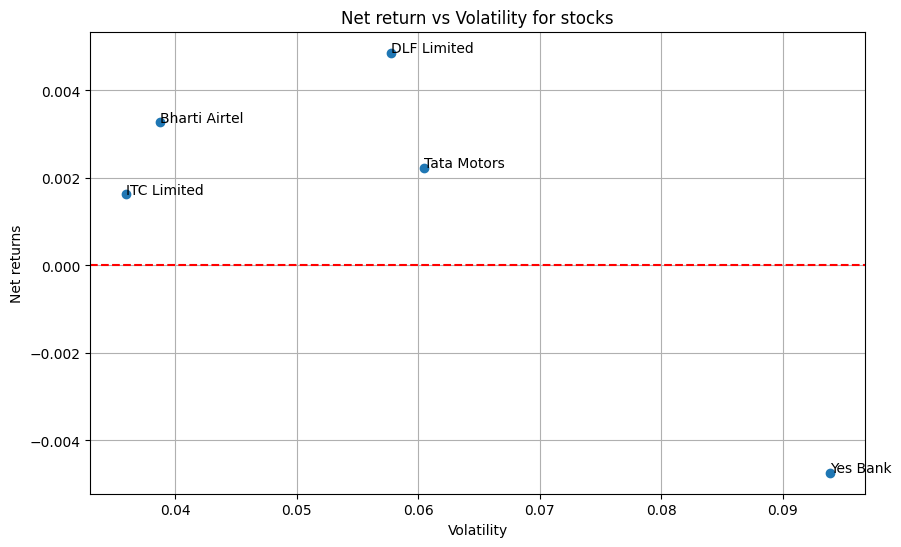

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.scatter(data['Std. Dev'], data['Mean'])  ## Complete the code to get the plot of returns vs volatility for the returns for all stocks
plt.axhline(y=0,linestyle='--', color = "red")

# The 'data' DataFrame has columns 'Mean' and 'Std. Dev', not 'Volatility'
# Replace 'row['Volatility']' with 'row['Std. Dev']'
for index, row in data.iterrows():
    ax.text(row['Std. Dev'], row['Mean'], index)
plt.xlabel('Volatility')
plt.ylabel('Net returns')
plt.title('Net return vs Volatility for stocks')
plt.grid()
plt.show()

In [ ]:
# Calculate weekly returns for each stock
returns_df = df.pct_change().dropna()
returns_df

ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
Date                                                                      
2016-04-04     0.004608      -0.044304     0.000000     0.061404 -0.011561
2016-04-11    -0.013761       0.019868    -0.031088    -0.008264  0.000000
2016-04-18     0.037209       0.038961     0.090909     0.016667  0.005848
2016-04-25    -0.040359      -0.003125     0.024510     0.000000  0.017442
2016-05-02     0.009346       0.025078    -0.023923     0.057377  0.085714
2016-05-09    -0.013889      -0.006116    -0.019608    -0.015504 -0.036842
2016-05-16    -0.004695      -0.015385    -0.015000    -0.039370  0.043716
2016-05-23     0.099057      -0.025000    -0.012690     0.016393  0.031414
2016-05-30     0.012876       0.019231     0.041131     0.040323  0.040609
2016-06-06     0.000000       0.012579     0.130864     0.031008  0.024390
2016-06-13    -0.016949      -0.024845    -0.015284    -0.007519  0.009524
2016-06-20     0.034483       0.022293     0.031042     0.015152  0.000000
2016-06-27    -0.016667      -0.006231    -0.027957    -0.007463  0.009434
2016-07-04     0.076271       0.047022     0.033186     0.142857  0.060748
2016-07-11    -0.023622      -0.011976     0.010707     0.039474 -0.004405
2016-07-18     0.004032       0.036364     0.048729     0.000000  0.039823
2016-07-25     0.004016      -0.040936     0.022222     0.000000 -0.021277
2016-08-01     0.008000       0.000000     0.001976     0.031646  0.065217
2016-08-08     0.003968      -0.003049     0.021696     0.012270  0.036735
2016-08-15     0.003953      -0.042813    -0.001931    -0.012121  0.015748
2016-08-22    -0.007874       0.009585    -0.015474     0.024540  0.034884
2016-08-29     0.003968      -0.018987     0.025540    -0.041916 -0.007491
2016-09-05     0.039526      -0.074194     0.053640    -0.062500  0.049057
2016-09-12    -0.026616       0.000000     0.001818     0.020000 -0.100719
2016-09-19     0.023438       0.013937     0.005445    -0.039216 -0.068000
2016-09-26    -0.034351       0.010309    -0.007220     0.054422  0.047210
2016-10-03    -0.035573      -0.037415    -0.020000    -0.045161  0.045082
2016-10-10    -0.008197       0.014134     0.059369     0.060811  0.003922
2016-10-17    -0.008264      -0.041812    -0.022767    -0.038217 -0.011719
2016-10-24     0.004167       0.003636    -0.025090     0.039735  0.043478
2016-10-31     0.008299       0.039855    -0.012868    -0.044586 -0.037879
2016-11-07     0.045267      -0.020906    -0.044693    -0.060000 -0.047244
2016-11-14    -0.043307      -0.032028    -0.011696    -0.177305  0.004132
2016-11-21    -0.061728       0.007353    -0.076923     0.000000 -0.028807
2016-11-28     0.000000      -0.010949    -0.036325    -0.034483 -0.038136
2016-12-05     0.004386       0.055351    -0.033259    -0.017857  0.017621
2016-12-12     0.021834       0.038462     0.059633     0.054545  0.047619
2016-12-19    -0.038462      -0.057239     0.019481    -0.034483 -0.020661
2016-12-26     0.000000      -0.053571    -0.010616     0.000000 -0.054852
2017-01-02     0.075556       0.030189     0.012876     0.035714  0.035714
2017-01-09     0.004132       0.058608     0.057203     0.094828  0.081897
2017-01-16     0.024691      -0.003460     0.040080    -0.007874  0.051793
2017-01-23     0.024096       0.003472     0.007707     0.007937  0.030303
2017-01-30     0.011765       0.006920     0.036329     0.070866  0.029412
2017-02-06     0.065891       0.096220    -0.025830     0.066176  0.007143
2017-02-13     0.000000       0.000000    -0.028409     0.027586  0.003546
2017-02-20    -0.032727       0.047022    -0.118908    -0.040268  0.017668
2017-02-27     0.000000      -0.008982     0.026549     0.041958  0.000000
2017-03-06    -0.011278      -0.021148    -0.004310    -0.026846  0.003472
2017-03-13     0.000000       0.015432     0.015152    -0.020690  0.024221
2017-03-20     0.076046      -0.051672     0.017058     0.042254  0.027027
2017-03-27    -0.010601      -0.01923

In [ ]:
# Compute mean and standard deviation of returns
mean_returns = returns_df.mean()
std_dev_returns = returns_df.std()

# Display mean and standard deviation values
mean_returns, std_dev_returns

(ITC Limited      0.002281
 Bharti Airtel    0.004029
 Tata Motors      0.004088
 DLF Limited      0.006540
 Yes Bank        -0.000475
 dtype: float64,
 ITC Limited      0.036127
 Bharti Airtel    0.039073
 Tata Motors      0.061976
 DLF Limited      0.057796
 Yes Bank         0.091095
 dtype: float64)

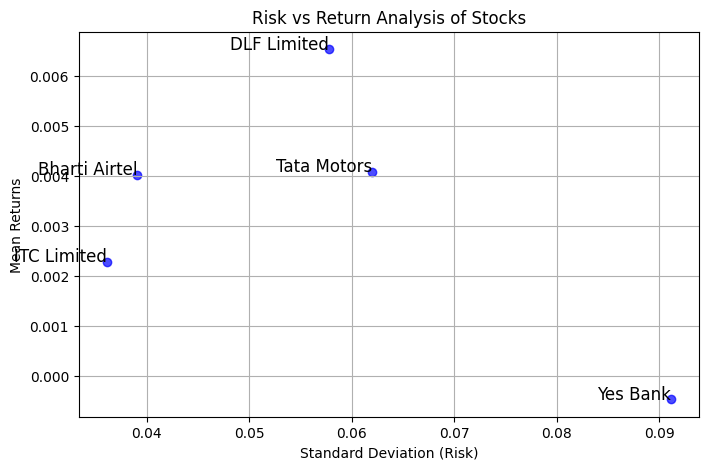

In [ ]:
# Plot Mean vs Standard Deviation of Returns
plt.figure(figsize=(8, 5))
plt.scatter(std_dev_returns, mean_returns, color='blue', alpha=0.7)
for stock in returns_df.columns:
    plt.text(std_dev_returns[stock], mean_returns[stock], stock, fontsize=12, ha='right')

plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("Mean Returns")
plt.title("Risk vs Return Analysis of Stocks")
plt.grid()
plt.show()

**Inference**
-

Risk and Return Relationship:

* DLF Limited and Tata Motors exhibit higher mean returns but also higher risk (standard deviation).
* ITC Limited and Bharti Airtel have moderate risk levels with relatively stable returns.
* Yes Bank has the highest risk but a negative mean return, indicating poor performance.

Defensive vs. Aggressive Stocks:

* Defensive Stocks (Lower risk, stable returns): ITC Limited, Bharti Airtel.
* Aggressive Stocks (Higher risk, potential for higher returns): DLF Limited, Tata Motors.
* Underperforming Stock: Yes Bank shows negative mean returns with high volatility, making it highly risky.

# Conclusions and Recommendations

Portfolio Diversification

* Investors seeking stability should focus on ITC Limited and Bharti Airtel, as they have lower volatility and consistent returns.
* For higher returns with higher risk, Tata Motors and DLF Limited could be included in a well-balanced portfolio.
* Yes Bank should be approached cautiously due to its negative returns and high risk.

Risk Management

* Risk-averse investors should allocate more funds to ITC Limited and Bharti Airtel.
* Investors with a higher risk appetite can include DLF Limited and Tata Motors but should monitor their positions closely.
* Implement stop-loss strategies for highly volatile stocks to minimize downside risk.

Periodic Monitoring & Adjustments

* Regularly reassess portfolio allocations based on changing market conditions.
Rebalance the portfolio to maintain an optimal risk-return ratio.
* Track macroeconomic and sector-specific factors that could impact stock volatility.

___